# **Machine Learning Case Study: League of Legends**

We have selected a League of Legends dataset to analyze the data and explore the possibility of applying machine learning models to predict match outcomes.

In each League of Legends match, two teams of five players (referred to as the blue team and the red team) face off on a battlefield. The objective is to destroy the enemy Nexus, located in the opposing team’s base. To achieve this goal, players must navigate three main lanes (top, mid, bot), as well as the jungle that connects these routes. Each player assumes a specific role, and the team's success depends on strategic decisions and individual player skill.

The data we will use includes more than 25,000 ranked matches in SOLO QUEUE mode within the Platinum ELO range. Each match is unique and identified by a gameId, allowing access to additional data using the Riot Games API. The data includes features collected at different points in the game, from the first 10 minutes until the end, providing a total of over 240,000 time-stamped records.

The aim of this analysis is to explore the 59 available features for the blue team, including metrics such as kills, deaths, gold, experience, level, among others. We also consider boolean categorical values indicating certain game conditions. The target variable hasWon enables us to address a classification problem to predict match outcomes, while the attribute gameDuration can be used to predict game duration.

This analysis will help to better understand the factors influencing match results and provide an opportunity for feature engineering to gain deeper insights. The richness of the data opens the door to various applications, such as predicting game outcomes or optimizing strategies within League of Legends.

| Data                          | Description                                                                 |
|-------------------------------|-----------------------------------------------------------------------------|
| gameId                        | Unique identifier for the match.                                            |
| gameDuration                  | Total duration of the match in seconds.                                     |
| hasWon                        | Indicates if the team won the match (1) or not (0).                         |
| frame                         | Specific moment of the match, measured in time intervals (e.g., 10 minutes, 12 minutes). |
| goldDiff                      | Gold difference between the teams at a given moment.                        |
| expDiff                       | Experience difference between the teams.                                    |
| champLevelDiff                | Champion level difference between teams.                                    |
| isFirstTower                  | Indicates if the first tower was destroyed (1: yes, 0: no).                 |
| isFirstBlood                  | Indicates if first blood was taken (1: yes, 0: no).                         |
| killedFireDrake               | Number of fire dragons killed by the team.                                  |
| killedWaterDrake              | Number of water dragons killed by the team.                                 |
| killedAirDrake                | Number of air dragons killed by the team.                                   |
| killedEarthDrake              | Number of earth dragons killed by the team.                                 |
| killedElderDrake              | Number of elder dragons killed by the team.                                 |
| lostFireDrake                 | Number of fire dragons lost (killed by the enemy).                          |
| lostWaterDrake                | Number of water dragons lost.                                               |
| lostAirDrake                  | Number of air dragons lost.                                                 |
| lostEarthDrake                | Number of earth dragons lost.                                               |
| lostElderDrake                | Number of elder dragons lost.                                               |
| killedBaronNashor             | Number of times Baron Nashor was killed.                                    |
| lostBaronNashor               | Number of times the enemy killed Baron Nashor.                              |
| killedRiftHerald              | Number of times the Rift Herald was killed.                                 |
| lostRiftHerald                | Number of times the enemy killed the Rift Herald.                           |
| destroyedTopInhibitor         | Number of top inhibitors destroyed.                                         |
| destroyedMidInhibitor         | Number of mid inhibitors destroyed.                                         |
| destroyedBotInhibitor         | Number of bot inhibitors destroyed.                                         |
| lostTopInhibitor              | Number of top inhibitors lost.                                              |
| lostMidInhibitor              | Number of mid inhibitors lost.                                              |
| lostBotInhibitor              | Number of bot inhibitors lost.                                              |
| destroyedTopNexusTurret       | Number of top nexus turrets destroyed.                                      |
| destroyedMidNexusTurret       | Number of mid nexus turrets destroyed.                                      |
| destroyedBotNexusTurret       | Number of bot nexus turrets destroyed.                                      |
| lostTopNexusTurret            | Number of top nexus turrets lost.                                           |
| lostMidNexusTurret            | Number of mid nexus turrets lost.                                           |
| lostBotNexusTurret            | Number of bot nexus turrets lost.                                           |
| destroyedTopBaseTurret        | Number of top base turrets destroyed.                                       |
| destroyedMidBaseTurret        | Number of mid base turrets destroyed.                                       |
| destroyedBotBaseTurret        | Number of bot base turrets destroyed.                                       |
| lostTopBaseTurret             | Number of top base turrets lost.                                            |
| lostMidBaseTurret             | Number of mid base turrets lost.                                            |
| lostBotBaseTurret             | Number of bot base turrets lost.                                            |
| destroyedTopInnerTurret       | Number of top inner turrets destroyed.                                      |
| destroyedMidInnerTurret       | Number of mid inner turrets destroyed.                                      |
| destroyedBotInnerTurret       | Number of bot inner turrets destroyed.                                      |
| lostTopInnerTurret            | Number of top inner turrets lost.                                           |
| lostMidInnerTurret            | Number of mid inner turrets lost.                                           |
| lostBotInnerTurret            | Number of bot inner turrets lost.                                           |
| destroyedTopOuterTurret       | Number of top outer turrets destroyed.                                      |
| destroyedMidOuterTurret       | Number of mid outer turrets destroyed.                                      |
| destroyedBotOuterTurret       | Number of bot outer turrets destroyed.                                      |
| lostTopOuterTurret            | Number of top outer turrets lost.                                           |
| lostMidOuterTurret            | Number of mid outer turrets lost.                                           |
| lostBotOuterTurret            | Number of bot outer turrets lost.                                           |
| kills                         | Number of kills made by the team or player.                                 |
| deaths                        | Number of times the team or player died.                                    |
| assists                       | Number of assists made by the team or player.                               |
| wardsPlaced                   | Number of wards placed.                                                     |
| wardsDestroyed                | Number of wards destroyed.                                                  |
| wardsLost                     | Number of wards lost.                                                       | 

## **Fase 1: Business Understanding**

In [1]:
import pandas as pd
import arff
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats  
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import roc_curve, auc, f1_score,classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

# Function to load the dataset

def load_arff_dataset(filepath: str) -> pd.DataFrame:
    """
    Load an ARFF dataset and convert it into a Pandas DataFrame.

    Parameters:
    ----------
    filepath : str
        The path to the ARFF file to be loaded.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing the data from the ARFF file, with columns 
        named according to the attribute names defined in the ARFF file.

    Raises:
    ------
    FileNotFoundError:
        If the specified file path does not exist.
    ValueError:
        If the ARFF file does not contain valid data.
    """
    with open(filepath, 'r') as f:
        arff_data = arff.load(f)
    
    df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])
    
    return df

In [55]:
arff_file_path = '../data/01_raw/dataset'

df = load_arff_dataset(arff_file_path)

In [3]:
# First 10 rows
df.head(10)

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
1,4546233126,1443000,1,12,-1306,-925,-0.6,0,1,0,...,0,0,0,0,6,11,6,28,4,6
2,4546233126,1443000,1,14,2115,2578,0.4,1,1,0,...,0,0,0,0,10,11,12,35,4,6
3,4546233126,1443000,1,16,1195,2134,0.4,1,1,0,...,0,0,1,0,10,12,12,45,6,10
4,4546233126,1443000,1,18,2931,4382,0.6,1,1,1,...,0,0,1,0,13,13,16,49,7,12
5,4546233126,1443000,1,20,6127,7606,0.8,1,1,1,...,1,0,1,0,20,14,28,63,9,13
6,4546233126,1443000,1,22,7428,7842,1.4,1,1,1,...,1,0,1,0,23,15,33,75,10,13
7,4546233126,1443000,1,24,9426,11980,1.8,1,1,2,...,1,0,1,0,26,15,36,85,11,14
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
9,4438212663,1241000,1,12,1263,1566,0.4,0,1,0,...,0,0,0,0,7,7,7,20,5,4


In [4]:
# last 10 rows
df.tail(10)

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
242562,4402156483,1774000,0,20,1440,1464,0.4,1,1,0,...,0,0,1,0,23,17,37,48,11,11
242563,4402156483,1774000,0,22,1291,634,0.2,1,1,0,...,0,0,1,0,25,20,41,54,11,12
242564,4402156483,1774000,0,24,-1321,-2549,-0.4,1,1,0,...,0,0,1,1,29,28,45,57,12,12
242565,4402156483,1774000,0,26,-4062,-5239,-0.8,1,1,1,...,0,0,1,1,30,32,47,67,14,15
242566,4402156483,1774000,0,28,-5640,-9016,-1.0,1,1,1,...,0,0,1,1,33,36,50,74,15,16
242567,4402156483,1774000,0,30,-8523,-13498,-1.6,1,1,1,...,0,0,1,1,33,41,50,80,18,17
242568,4379826739,1013000,0,10,-271,-1243,-0.2,0,1,0,...,0,0,0,0,6,5,6,18,1,2
242569,4379826739,1013000,0,12,-2013,-3493,-0.8,0,1,0,...,0,0,0,0,7,8,6,23,1,5
242570,4379826739,1013000,0,14,-2388,-4543,-0.8,0,1,0,...,0,0,0,0,10,13,9,27,5,6
242571,4379826739,1013000,0,16,-5601,-7595,-1.2,0,1,0,...,0,0,0,0,11,17,10,31,6,10


In [5]:
# Columns and datatype 
columnas = df.columns
for columna in columnas:
    print(f'{columna} es de tipo {df[columna].dtype}')

gameId es de tipo int64
gameDuration es de tipo int64
hasWon es de tipo int64
frame es de tipo int64
goldDiff es de tipo int64
expDiff es de tipo int64
champLevelDiff es de tipo float64
isFirstTower es de tipo int64
isFirstBlood es de tipo int64
killedFireDrake es de tipo int64
killedWaterDrake es de tipo int64
killedAirDrake es de tipo int64
killedEarthDrake es de tipo int64
killedElderDrake es de tipo int64
lostFireDrake es de tipo int64
lostWaterDrake es de tipo int64
lostAirDrake es de tipo int64
lostEarthDrake es de tipo int64
lostElderDrake es de tipo int64
killedBaronNashor es de tipo int64
lostBaronNashor es de tipo int64
killedRiftHerald es de tipo int64
lostRiftHerald es de tipo int64
destroyedTopInhibitor es de tipo int64
destroyedMidInhibitor es de tipo int64
destroyedBotInhibitor es de tipo int64
lostTopInhibitor es de tipo int64
lostMidInhibitor es de tipo int64
lostBotInhibitor es de tipo int64
destroyedTopNexusTurret es de tipo int64
destroyedMidNexusTurret es de tipo i

In [6]:
num_rows = df.shape[0]
print(f'The dataset has {num_rows} rows.')

The dataset has 242572 rows.


# Hypotheses

Based on the available data, we could work under the following hypotheses:

* How do neutral objectives (Dragons, Baron, and Rift Herald) impact a team’s victory?
* Time series prediction
* Does the number of kills and assists in the first 10 minutes (frame) significantly impact a team’s chances of victory?
* Does securing First Blood increase the chances of winning the game?

## **Fase 2: Data Understanding**

### Null Data Verification

In [8]:
df.isnull().sum()

gameId                     0
gameDuration               0
hasWon                     0
frame                      0
goldDiff                   0
expDiff                    0
champLevelDiff             0
isFirstTower               0
isFirstBlood               0
killedFireDrake            0
killedWaterDrake           0
killedAirDrake             0
killedEarthDrake           0
killedElderDrake           0
lostFireDrake              0
lostWaterDrake             0
lostAirDrake               0
lostEarthDrake             0
lostElderDrake             0
killedBaronNashor          0
lostBaronNashor            0
killedRiftHerald           0
lostRiftHerald             0
destroyedTopInhibitor      0
destroyedMidInhibitor      0
destroyedBotInhibitor      0
lostTopInhibitor           0
lostMidInhibitor           0
lostBotInhibitor           0
destroyedTopNexusTurret    0
destroyedMidNexusTurret    0
destroyedBotNexusTurret    0
lostTopNexusTurret         0
lostMidNexusTurret         0
lostBotNexusTu

We can observe that there are no null values within the dataset.

In [7]:
df.nunique()

gameId                     24912
gameDuration                2074
hasWon                         2
frame                         24
goldDiff                   28629
expDiff                    28949
champLevelDiff               123
isFirstTower                   2
isFirstBlood                   2
killedFireDrake                5
killedWaterDrake               5
killedAirDrake                 5
killedEarthDrake               5
killedElderDrake               4
lostFireDrake                  5
lostWaterDrake                 5
lostAirDrake                   5
lostEarthDrake                 5
lostElderDrake                 4
killedBaronNashor              5
lostBaronNashor                5
killedRiftHerald               3
lostRiftHerald                 3
destroyedTopInhibitor          4
destroyedMidInhibitor          4
destroyedBotInhibitor          5
lostTopInhibitor               4
lostMidInhibitor               4
lostBotInhibitor               5
destroyedTopNexusTurret        2
destroyedM

In [9]:
# List to store the names of columns with negative numbers
columns_with_negatives = []

# Iterate over each column and check if it contains negative numbers
for column in df.columns:
    if (df[column] < 0).any():
        columns_with_negatives.append(column)

if columns_with_negatives:
    print("Columns with negative numbers:", columns_with_negatives)
else:
    print("There are no columns with negative numbers.")


Columns with negative numbers: ['goldDiff', 'expDiff', 'champLevelDiff']


The columns that contain negative numbers are correct, as it is possible for there to be negative differences in both gold and experience, as well as in champion levels during the game.

### Measures of Position

In [9]:
df.describe()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
count,2.425720e+05,2.425720e+05,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,...,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000
mean,4.501480e+09,1.785494e+06,0.498128,19.811264,-11.413811,-215.019351,-0.026517,0.617709,0.998627,0.295908,...,0.369997,0.376795,0.368822,0.355243,16.391381,16.342220,21.166029,56.833530,10.487031,10.263077
std,5.331693e+07,3.761901e+05,0.499998,7.197339,5438.051920,5261.880802,0.772366,0.485948,0.037026,0.509759,...,0.482805,0.484584,0.482487,0.478588,9.660237,9.697602,16.055645,58.734777,8.713549,8.736323
min,4.357970e+09,5.490000e+05,0.000000,10.000000,-21578.000000,-32484.000000,-4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,4.463051e+09,1.532000e+06,0.000000,14.000000,-3420.250000,-3148.000000,-0.600000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,25.000000,4.000000,4.000000
50%,4.529395e+09,1.774000e+06,0.000000,18.000000,24.000000,-123.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,15.000000,15.000000,17.000000,40.000000,8.000000,8.000000
75%,4.543718e+09,2.025000e+06,1.000000,24.000000,3409.000000,2772.000000,0.400000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,22.000000,22.000000,30.000000,63.000000,15.000000,14.000000
max,4.547671e+09,3.428000e+06,1.000000,56.000000,23432.000000,43304.000000,3.800000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,69.000000,72.000000,137.000000,1014.000000,115.000000,107.000000


In [10]:
for column in df.columns:
    mean = df[column].mean()
    mode = df[column].mode()[0] if not df[column].mode().empty else 'No mode'
    median = df[column].median()
    std_dev = df[column].std()
    print(f"Column: {column}")
    print(f" - Mean: {mean}")
    print(f" - Mode: {mode}")
    print(f" - Median: {median}")
    print(f" - Standard Deviation: {std_dev}\n")


Column: gameId
 - Mean: 4501479546.200077
 - Mode: 4361896408
 - Median: 4529395251.0
 - Standard Deviation: 53316927.63205334

Column: gameDuration
 - Mean: 1785493.8945962435
 - Mode: 1775000
 - Median: 1774000.0
 - Standard Deviation: 376190.06291678606

Column: hasWon
 - Mean: 0.4981283907458404
 - Mode: 0
 - Median: 0.0
 - Standard Deviation: 0.4999975276843313

Column: frame
 - Mean: 19.811264284418648
 - Mode: 10
 - Median: 18.0
 - Standard Deviation: 7.197338964616284

Column: goldDiff
 - Mean: -11.413811157099747
 - Mode: 647
 - Median: 24.0
 - Standard Deviation: 5438.051920127789

Column: expDiff
 - Mean: -215.01935095559256
 - Mode: -589
 - Median: -123.0
 - Standard Deviation: 5261.880802086872

Column: champLevelDiff
 - Mean: -0.0265166630938443
 - Mode: 0.0
 - Median: 0.0
 - Standard Deviation: 0.7723658247149056

Column: isFirstTower
 - Mean: 0.6177093811322
 - Mode: 1
 - Median: 1.0
 - Standard Deviation: 0.4859480168703304

Column: isFirstBlood
 - Mean: 0.998627211714

### Charts

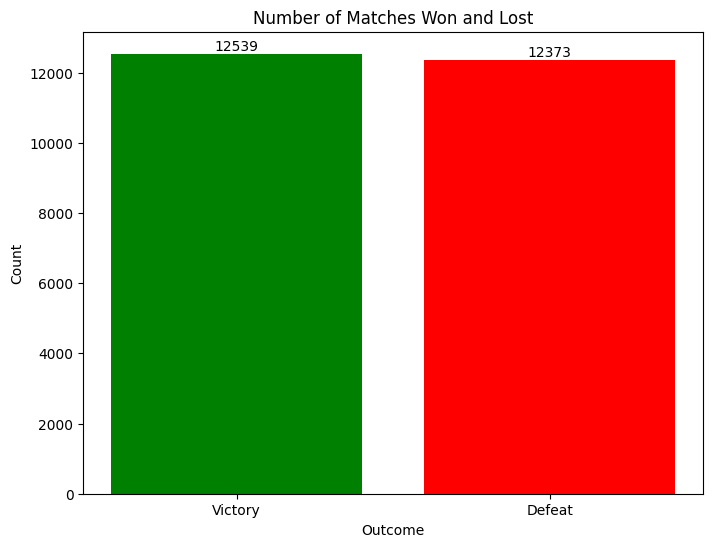

In [11]:
# Group by 'gameId' and sum the victories
results_per_game = df.groupby('gameId')['hasWon'].sum().reset_index()

# Determine if the match was won or lost
results_per_game['Outcome'] = results_per_game['hasWon'].apply(lambda x: 'Victory' if x > 0 else 'Defeat')

# Count the number of won and lost matches
outcome_count = results_per_game['Outcome'].value_counts().reset_index()
outcome_count.columns = ['Outcome', 'Count']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(outcome_count['Outcome'], outcome_count['Count'], color=['green', 'red'])

# Add numbers on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, int(height), ha='center', va='bottom')

plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Number of Matches Won and Lost')
plt.show()


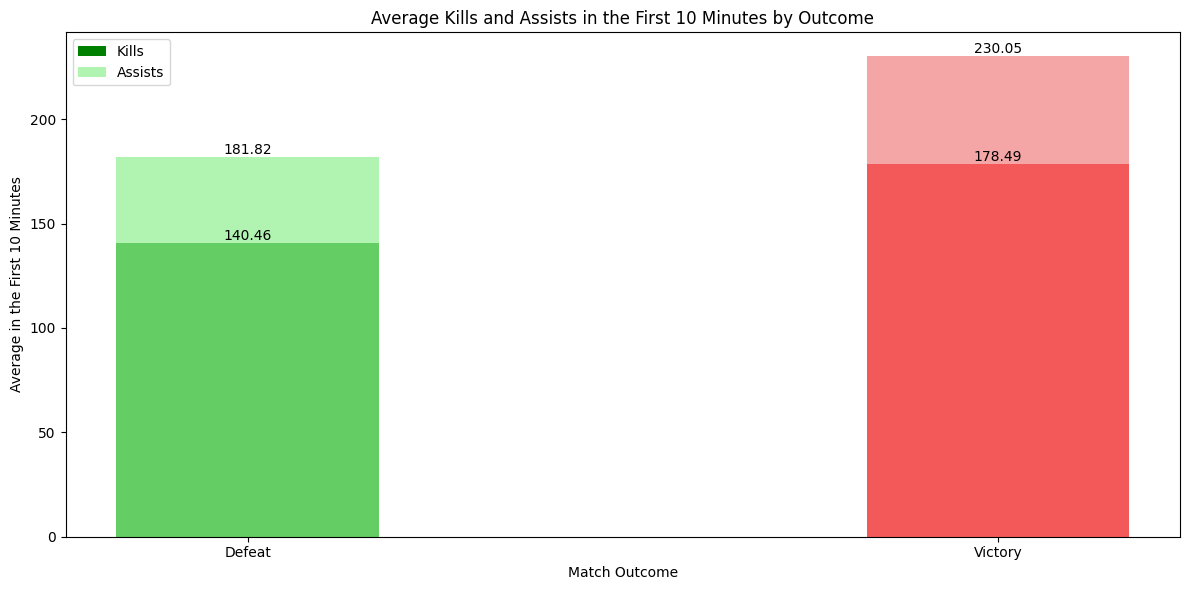

Total games analyzed: 24912
Victories: 12539 (50.33%)
Defeats: 12373 (49.67%)

Statistics for the first 10 minutes:
              kills     assists
Outcome                        
Defeat   140.463267  181.817506
Victory  178.494138  230.054869

Correlation between kills and victory: 0.4233
Correlation between assists and victory: 0.3971


In [12]:
# Filter the data for the first 10 minutes (600 seconds)
df_early = df[df['frame'] <= 600]

# Group by 'gameId' and sum kills, assists, and hasWon
early_game_stats = df_early.groupby('gameId').agg({
    'kills': 'sum',
    'assists': 'sum',
    'hasWon': 'sum'
}).reset_index()

# Determine if the match was won or lost
early_game_stats['Outcome'] = early_game_stats['hasWon'].apply(lambda x: 'Victory' if x > 0 else 'Defeat')

# Calculate the mean of kills and assists for won and lost matches
mean_stats = early_game_stats.groupby('Outcome')[['kills', 'assists']].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(12, 6))

# Bars for kills
bars_kills = plt.bar(mean_stats['Outcome'], mean_stats['kills'], width=0.35, label='Kills', color=['green', 'red'])
# Bars for assists
bars_assists = plt.bar(mean_stats['Outcome'], mean_stats['assists'], width=0.35, label='Assists', color=['lightgreen', 'lightcoral'], alpha=0.7)

# Add numbers on top of the bars
for bars in [bars_kills, bars_assists]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('Match Outcome')
plt.ylabel('Average in the First 10 Minutes')
plt.title('Average Kills and Assists in the First 10 Minutes by Outcome')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate and display additional statistics
total_games = len(early_game_stats)
victories = early_game_stats['Outcome'].value_counts()['Victory']
defeats = total_games - victories

print(f"Total games analyzed: {total_games}")
print(f"Victories: {victories} ({victories/total_games*100:.2f}%)")
print(f"Defeats: {defeats} ({defeats/total_games*100:.2f}%)")

print("\nStatistics for the first 10 minutes:")
print(early_game_stats.groupby('Outcome')[['kills', 'assists']].mean())

# Calculate the correlation between kills/assists and victory
correlation_kills = early_game_stats['kills'].corr(early_game_stats['hasWon'])
correlation_assists = early_game_stats['assists'].corr(early_game_stats['hasWon'])

print(f"\nCorrelation between kills and victory: {correlation_kills:.4f}")
print(f"Correlation between assists and victory: {correlation_assists:.4f}")


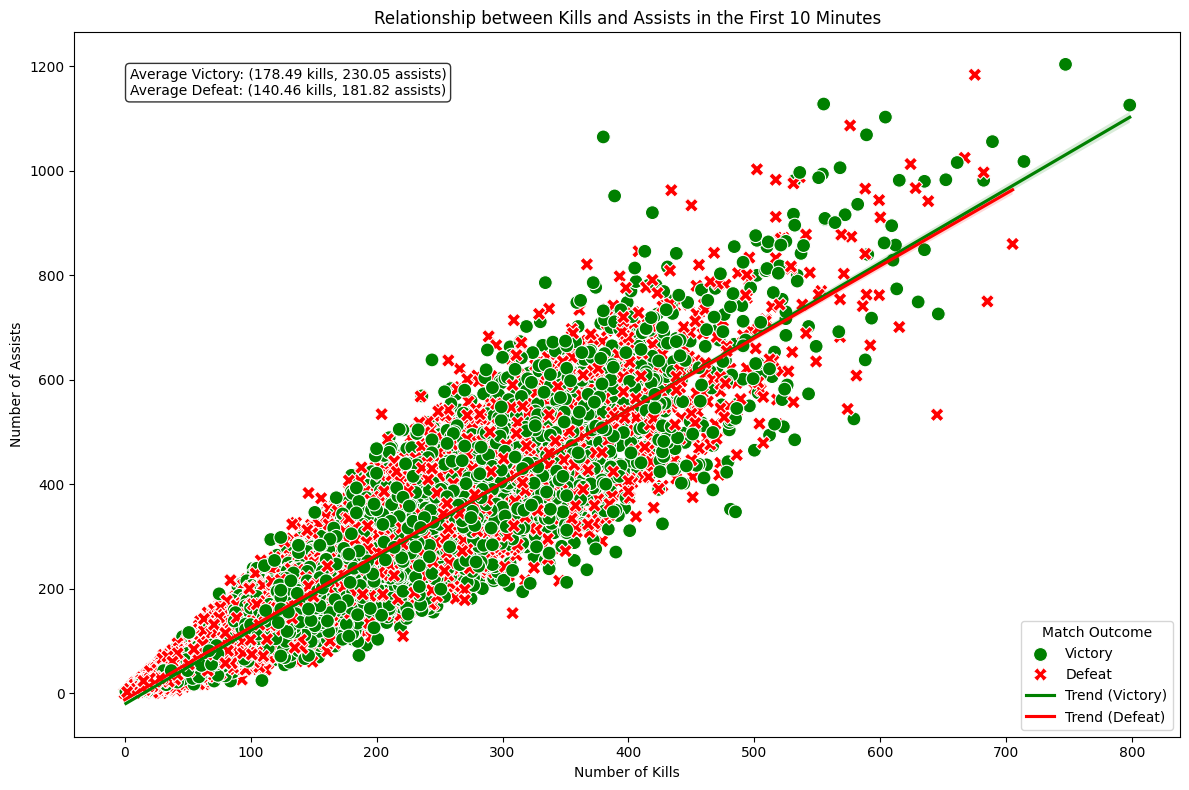

Correlations for won matches:
            kills   assists
kills    1.000000  0.914643
assists  0.914643  1.000000

Correlations for lost matches:
            kills   assists
kills    1.000000  0.939336
assists  0.939336  1.000000

T-test for kills: t-statistic = 31.4574, p-value = 0.0000
T-test for assists: t-statistic = 26.5089, p-value = 0.0000


In [13]:
# Filter the data for the first 10 minutes (600 seconds)
df_early = df[df['frame'] <= 600]

# Group by 'gameId' and sum kills, assists, and hasWon
early_game_stats = df_early.groupby('gameId').agg({
    'kills': 'sum',
    'assists': 'sum',
    'hasWon': 'sum'
}).reset_index()

# Determine if the match was won or lost
early_game_stats['Outcome'] = early_game_stats['hasWon'].apply(lambda x: 'Victory' if x > 0 else 'Defeat')

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=early_game_stats, x='kills', y='assists', hue='Outcome', 
                          style='Outcome', s=100, palette={'Victory': 'green', 'Defeat': 'red'})

# Add a regression line for each group
sns.regplot(data=early_game_stats[early_game_stats['Outcome'] == 'Victory'], 
            x='kills', y='assists', scatter=False, color='green', label='Trend (Victory)')
sns.regplot(data=early_game_stats[early_game_stats['Outcome'] == 'Defeat'], 
            x='kills', y='assists', scatter=False, color='red', label='Trend (Defeat)')

plt.title('Relationship between Kills and Assists in the First 10 Minutes')
plt.xlabel('Number of Kills')
plt.ylabel('Number of Assists')
plt.legend(title='Match Outcome')

# Add text with statistics
victory = early_game_stats[early_game_stats['Outcome'] == 'Victory']
defeat = early_game_stats[early_game_stats['Outcome'] == 'Defeat']

stats_text = f"Average Victory: ({victory['kills'].mean():.2f} kills, {victory['assists'].mean():.2f} assists)\n"
stats_text += f"Average Defeat: ({defeat['kills'].mean():.2f} kills, {defeat['assists'].mean():.2f} assists)"

plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Calculate and display correlations
print("Correlations for won matches:")
print(victory[['kills', 'assists']].corr())
print("\nCorrelations for lost matches:")
print(defeat[['kills', 'assists']].corr())

# Perform t-test for kills and assists
t_stat_kills, p_value_kills = stats.ttest_ind(victory['kills'], defeat['kills'])
t_stat_assists, p_value_assists = stats.ttest_ind(victory['assists'], defeat['assists'])

print(f"\nT-test for kills: t-statistic = {t_stat_kills:.4f}, p-value = {p_value_kills:.4f}")
print(f"T-test for assists: t-statistic = {t_stat_assists:.4f}, p-value = {p_value_assists:.4f}")


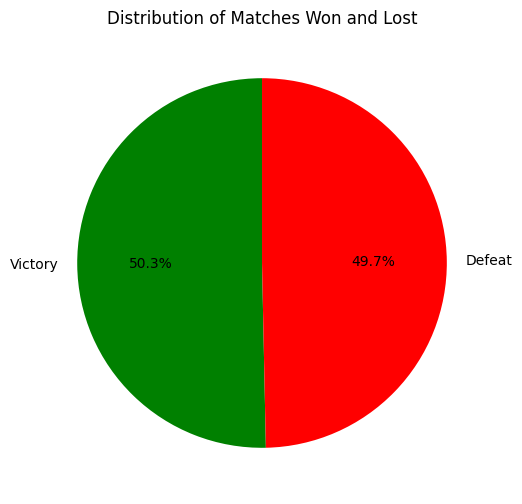

In [14]:
# Filter the last frame of each game
df_last_frame = df.loc[df.groupby('gameId')['frame'].idxmax()]

# Calculate the distribution of victories and defeats directly
victories = df_last_frame['hasWon'].sum()
defeats = len(df_last_frame) - victories

# Prepare the data for the pie chart
labels = ['Victory', 'Defeat']
sizes = [victories, defeats]
colors = ['green', 'red']  # 'green' for victories and 'red' for defeats

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Matches Won and Lost')
plt.ylabel('')
plt.show()


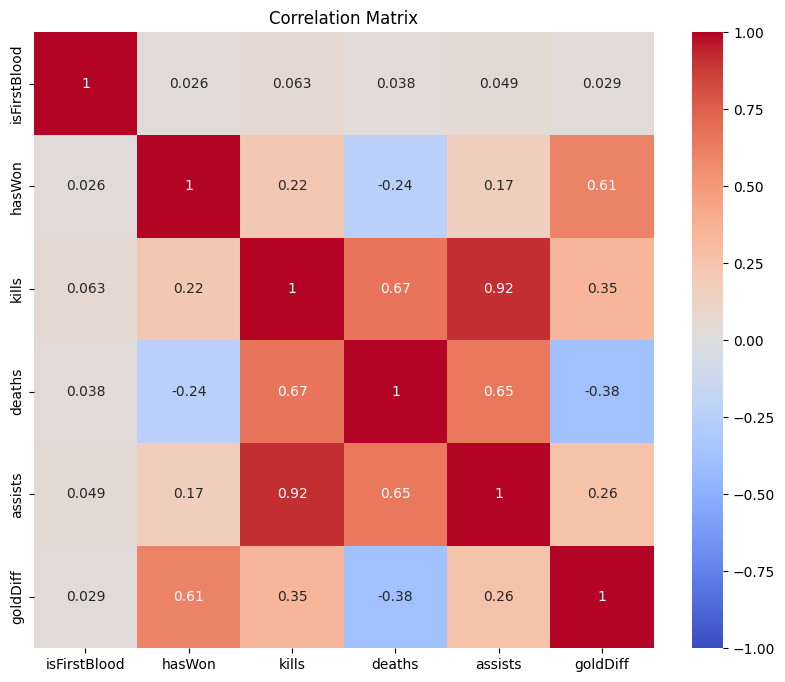

In [22]:
# Correlation between relevant variables
correlation_vars = ['isFirstBlood', 'hasWon', 'kills', 'deaths', 'assists', 'goldDiff']
correlation_matrix = df[correlation_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()


## **Fase 3: Data Preparation**

To work on data preparation, cleaning and processing will be carried out according to the specific needs of each hypothesis.

### **How do neutral objectives (Dragons, Baron, and Rift Herald) impact a team’s victory?**

### **Variable Selection:**

In [5]:
def used_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Selects and returns relevant columns from a given DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame from which relevant columns will be selected.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing only the relevant columns: 
        ['gameId', 'hasWon', 'frame', 'killedFireDrake', 
         'killedWaterDrake', 'killedAirDrake', 'killedEarthDrake', 
         'killedElderDrake', 'lostFireDrake', 'lostWaterDrake', 
         'lostAirDrake', 'lostEarthDrake', 'lostElderDrake', 
         'killedBaronNashor', 'lostBaronNashor', 'killedRiftHerald', 
         'lostRiftHerald'].

    Raises:
    ------
    KeyError:
        If any of the specified columns are not present in the input DataFrame.
    """
    
    # Define the relevant columns
    columns = ['gameId', 'hasWon', 'frame', 'killedFireDrake', 
               'killedWaterDrake', 'killedAirDrake', 'killedEarthDrake', 
               'killedElderDrake', 'lostFireDrake', 'lostWaterDrake', 
               'lostAirDrake', 'lostEarthDrake', 'lostElderDrake', 
               'killedBaronNashor', 'lostBaronNashor', 'killedRiftHerald', 
               'lostRiftHerald']
    
    # Select the relevant columns
    df_relevant = df[columns]
    
    return df_relevant

**assert**

In [6]:
test_data = {
    'gameId': [1, 1, 2, 2],
    'hasWon': [1, 0, 1, 0],
    'frame': [100, 200, 300, 400],
    'killedFireDrake': [1, 0, 1, 0],
    'killedWaterDrake': [0, 1, 0, 1],
    'killedAirDrake': [1, 0, 1, 0],
    'killedEarthDrake': [0, 0, 1, 1],
    'killedElderDrake': [0, 0, 1, 0],
    'lostFireDrake': [0, 1, 0, 1],
    'lostWaterDrake': [1, 0, 1, 0],
    'lostAirDrake': [0, 0, 0, 0],
    'lostEarthDrake': [1, 1, 0, 0],
    'lostElderDrake': [0, 1, 0, 1],
    'killedBaronNashor': [0, 1, 0, 0],
    'lostBaronNashor': [1, 0, 0, 1],
    'killedRiftHerald': [1, 0, 1, 0],
    'lostRiftHerald': [0, 1, 0, 0],
}
# Create test dataframe
test_df = pd.DataFrame(test_data)

df_selected = used_columns(test_df)

expected_columns = ['gameId', 'hasWon', 'frame', 'killedFireDrake', 
                    'killedWaterDrake', 'killedAirDrake', 'killedEarthDrake', 
                    'killedElderDrake', 'lostFireDrake', 'lostWaterDrake', 
                    'lostAirDrake', 'lostEarthDrake', 'lostElderDrake', 
                    'killedBaronNashor', 'lostBaronNashor', 'killedRiftHerald', 
                    'lostRiftHerald']

assert set(expected_columns).issubset(df_selected.columns), "Not all expected columns were found."

**Application of the Function**

In [7]:
# Create a copy of the original DataFrame
df_cp = df.copy()

df_use = used_columns(df_cp)

df_use.head()

,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald
0,4546233126,1,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,4546233126,1,12,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,4546233126,1,14,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,4546233126,1,16,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,4546233126,1,18,1,0,0,1,0,0,1,0,0,0,0,0,0,1


In [8]:
# Selects the last frame for each game to obtain the final values of each column.
def select_last_frame(df: pd.DataFrame) -> pd.DataFrame:
    """
    Selects the last frame for each game in the DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing game data, which includes 'gameId' and 'frame' columns.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing only the last frame for each game, identified by 'gameId'.

    Notes:
    ------
    The function assumes that the DataFrame contains a 'frame' column that can be used to determine 
    the last frame for each 'gameId'.
    """
    
    # Select the last frame for each game
    df_last_frame = df.loc[df.groupby('gameId')['frame'].idxmax()]
    
    return df_last_frame

**assert**

In [9]:
df_last_frame = select_last_frame(test_df)

expected_game_ids = [1, 2]  

assert set(expected_game_ids) == set(df_last_frame['gameId']), "No se encontraron los gameIds esperados."

**Application of the Function**

In [10]:
df_last_frame = select_last_frame(df_use)

# Shows the DataFrame result
df_last_frame.head()

,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald
186421,4357970300,1,34,0,1,1,1,0,0,0,2,0,0,2,0,1,1
176926,4357978575,0,26,0,0,0,0,0,2,0,1,1,0,0,1,0,2
122571,4358313595,0,24,1,0,1,0,0,0,2,0,0,0,0,1,0,2
233782,4358316661,0,20,0,0,0,0,0,1,1,1,0,0,0,0,1,1
200223,4358361767,1,26,2,0,1,1,0,0,0,0,0,0,1,0,1,0


### **Generating New Variables:**

In [11]:
#    Generate new variables based on neutral objectives.

def create_new_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Generates new variables based on neutral objectives in the DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing neutral objectives data.

    Returns:
    -------
    pd.DataFrame
        The original DataFrame with additional columns representing totals 
        of killed and lost neutral objectives.

    New Columns:
    ------------
    - totalDragonsKilled: Total number of dragons killed (sum of individual drakes).
    - totalDragonsLost: Total number of dragons lost (sum of individual drakes lost).
    - totalObjectivesKilled: Total number of objectives killed (sum of Baron Nashor and Rift Herald).
    - totalObjectivesLost: Total number of objectives lost (sum of lost Baron Nashor and Rift Herald).
    """
    
    # Generate new columns based on neutral objectives
    df['totalDragonsKilled'] = (df['killedFireDrake'] + df['killedWaterDrake'] + 
                                df['killedAirDrake'] + df['killedEarthDrake'] +
                                df['killedElderDrake'])
    df['totalDragonsLost'] = (df['lostFireDrake'] + df['lostWaterDrake'] + 
                              df['lostAirDrake'] + df['lostEarthDrake'] + 
                              df['lostElderDrake'])
    df['totalObjectivesKilled'] = (df['killedBaronNashor'] + df['killedRiftHerald'])
    df['totalObjectivesLost'] = (df['lostBaronNashor'] + df['lostRiftHerald'])
    
    return df



**assert**

In [12]:
# Sample DataFrame to test the function
test_data = {
    'gameId': [1, 2],
    'hasWon': [1, 0],
    'frame': [100, 200],
    'killedFireDrake': [1, 0],
    'killedWaterDrake': [0, 1],
    'killedAirDrake': [1, 0],
    'killedEarthDrake': [0, 1],
    'killedElderDrake': [0, 0],
    'lostFireDrake': [0, 1],
    'lostWaterDrake': [1, 0],
    'lostAirDrake': [0, 0],
    'lostEarthDrake': [1, 0],
    'lostElderDrake': [0, 1],
    'killedBaronNashor': [0, 1],
    'lostBaronNashor': [1, 0],
    'killedRiftHerald': [1, 0],
    'lostRiftHerald': [0, 1],
}

# Create a test DataFrame
test_df = pd.DataFrame(test_data)

# Apply the function
df_new_columns = create_new_columns(test_df)

# Define expected new columns
expected_columns = ['totalDragonsKilled', 'totalDragonsLost', 
                    'totalObjectivesKilled', 'totalObjectivesLost']

# Check if the new columns are added correctly
assert set(expected_columns).issubset(df_new_columns.columns), "Not all expected new columns were found."

# Check the calculated values
assert df_new_columns['totalDragonsKilled'].iloc[0] == 2, "Error in totalDragonsKilled calculation for gameId 1"
assert df_new_columns['totalDragonsLost'].iloc[0] == 2, "Error in totalDragonsLost calculation for gameId 1"
assert df_new_columns['totalObjectivesKilled'].iloc[0] == 1, "Error in totalObjectivesKilled calculation for gameId 1"
assert df_new_columns['totalObjectivesLost'].iloc[0] == 1, "Error in totalObjectivesLost calculation for gameId 1"

# Additional assertions for the second row
assert df_new_columns['totalDragonsKilled'].iloc[1] == 2, "Error in totalDragonsKilled calculation for gameId 2"
assert df_new_columns['totalDragonsLost'].iloc[1] == 2, "Error in totalDragonsLost calculation for gameId 2"
assert df_new_columns['totalObjectivesKilled'].iloc[1] == 1, "Error in totalObjectivesKilled calculation for gameId 2"
assert df_new_columns['totalObjectivesLost'].iloc[1] == 1, "Error in totalObjectivesLost calculation for gameId 2"


**Application of the Function**

In [13]:
df_ncolum = create_new_columns(df_last_frame)
df_ncolum.head()

,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,...,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,totalDragonsKilled,totalDragonsLost,totalObjectivesKilled,totalObjectivesLost
186421,4357970300,1,34,0,1,1,1,0,0,0,...,0,0,2,0,1,1,3,2,3,1
176926,4357978575,0,26,0,0,0,0,0,2,0,...,1,0,0,1,0,2,0,4,0,3
122571,4358313595,0,24,1,0,1,0,0,0,2,...,0,0,0,1,0,2,2,2,0,3
233782,4358316661,0,20,0,0,0,0,0,1,1,...,0,0,0,0,1,1,0,3,1,1
200223,4358361767,1,26,2,0,1,1,0,0,0,...,0,0,1,0,1,0,4,0,2,0


### **Graph:**


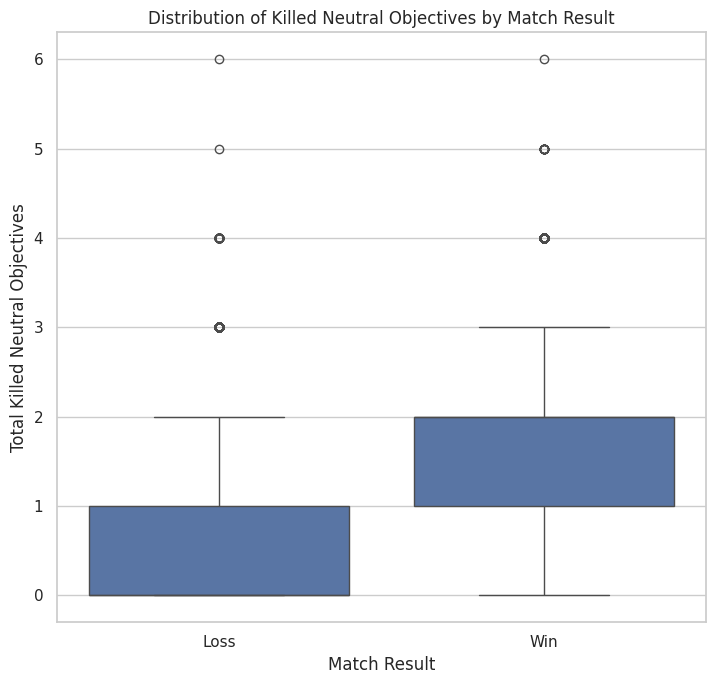

In [14]:
#    Create a graph to visualize the distribution of neutral objectives killed by match result.

def plot_neutral_objectives_wins(df: pd.DataFrame) -> None:
    """
    Creates a boxplot to visualize the distribution of neutral objectives killed
    based on the match result (win or loss).

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the match results and neutral objectives data.

    Returns:
    -------
    None
        This function does not return any value; it displays a plot.
    """
    
    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(14, 7))
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='hasWon', y='totalObjectivesKilled', data=df)
    
    # Customize axes and title
    plt.title('Distribution of Killed Neutral Objectives by Match Result')
    plt.xlabel('Match Result')
    plt.ylabel('Total Killed Neutral Objectives')
    
    plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
    
    plt.tight_layout()
    plt.show()

plot_neutral_objectives_wins(df_ncolum)

### **Measures of Position:**


In [15]:
#Calculate the mean and standard deviation for neutral objectives.

def calculate_statistics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the mean and standard deviation for neutral objectives in the DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing data about neutral objectives.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing the mean and standard deviation for specified columns.
    """
    
    columns = ['killedFireDrake', 'killedWaterDrake', 'killedAirDrake',
               'killedEarthDrake', 'killedElderDrake', 'lostFireDrake',
               'lostWaterDrake', 'lostAirDrake', 'lostEarthDrake', 'lostElderDrake',
               'killedBaronNashor', 'lostBaronNashor', 'killedRiftHerald', 
               'lostRiftHerald', 'totalDragonsKilled', 'totalObjectivesKilled',
               'totalDragonsLost', 'totalObjectivesLost']
    
    # Calculate the mean and standard deviation
    statistics = {
        'Mean': df[columns].mean(),
        'Standard Deviation': df[columns].std()
    }
    
    # Create a DataFrame for the statistics
    df_statistics = pd.DataFrame(statistics)
    
    return df_statistics

**assert**

In [16]:
# Create a test DataFrame
test_data = {
    'killedFireDrake': [1, 0, 2, 1],
    'killedWaterDrake': [0, 1, 1, 0],
    'killedAirDrake': [1, 1, 0, 0],
    'killedEarthDrake': [0, 1, 0, 1],
    'killedElderDrake': [1, 0, 1, 1],
    'lostFireDrake': [0, 1, 0, 1],
    'lostWaterDrake': [1, 0, 1, 0],
    'lostAirDrake': [0, 0, 0, 1],
    'lostEarthDrake': [1, 1, 0, 0],
    'lostElderDrake': [0, 1, 0, 1],
    'killedBaronNashor': [0, 1, 0, 0],
    'lostBaronNashor': [1, 0, 0, 1],
    'killedRiftHerald': [1, 0, 1, 0],
    'lostRiftHerald': [0, 1, 0, 0],
    'totalDragonsKilled': [2, 2, 3, 2],
    'totalObjectivesKilled': [2, 1, 1, 0],
    'totalDragonsLost': [2, 2, 1, 1],
    'totalObjectivesLost': [1, 1, 0, 1]
}

# Test DataFrame
df_test = pd.DataFrame(test_data)

# Calculate statistics
df_statistics = calculate_statistics(df_test)

# Assert to check if the mean of 'killedFireDrake' is as expected
assert df_statistics.loc['killedFireDrake', 'Mean'] == 1.0, "Mean for killedFireDrake is incorrect."
# Assert to check if the standard deviation of 'killedFireDrake' is as expected
assert df_statistics.loc['killedFireDrake', 'Standard Deviation'] == 0.816496580927726, "Standard deviation for killedFireDrake is incorrect."

**Application of the Function**

In [17]:
df_stats= calculate_statistics(df_ncolum)
print(df_stats)

                           Mean  Standard Deviation
killedFireDrake        0.451549            0.647978
killedWaterDrake       0.459136            0.656009
killedAirDrake         0.456487            0.651417
killedEarthDrake       0.461103            0.658937
killedElderDrake       0.025450            0.166413
lostFireDrake          0.462749            0.658301
lostWaterDrake         0.477079            0.663024
lostAirDrake           0.471299            0.661526
lostEarthDrake         0.480170            0.674587
lostElderDrake         0.027015            0.170341
killedBaronNashor      0.428468            0.611155
lostBaronNashor        0.479006            0.639356
killedRiftHerald       0.749037            0.730657
lostRiftHerald         0.869099            0.739101
totalDragonsKilled     1.853725            1.335691
totalObjectivesKilled  1.177505            1.018260
totalDragonsLost       1.918312            1.363175
totalObjectivesLost    1.348105            1.058090


In [18]:
#    Calculates the correlation between neutral objectives and the match result.
def calculate_correlation_with_victories(df: pd.DataFrame) -> pd.Series:
    """
    Calculates the correlation between neutral objectives and the match result.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing data about neutral objectives and match outcomes.

    Returns:
    -------
    pd.Series
        A Series containing the correlation coefficients of the specified columns with the match result.
    """
    
    correlations = df.corr()['hasWon'].sort_values(ascending=False)
    return correlations

**assert**

In [19]:
# Test DataFrame
test_data = {
    'hasWon': [1, 0, 1, 0, 1, 0, 1, 0],
    'killedFireDrake': [1, 0, 1, 0, 1, 0, 0, 0],
    'killedWaterDrake': [0, 1, 0, 1, 1, 1, 0, 0],
    'killedBaronNashor': [0, 1, 0, 0, 1, 0, 0, 1],
    'killedRiftHerald': [1, 0, 1, 1, 0, 0, 1, 0],
    'totalObjectivesKilled': [2, 1, 2, 1, 2, 1, 1, 1]
}

# Create the test DataFrame
df_test = pd.DataFrame(test_data)

# Calculate correlations
correlations = calculate_correlation_with_victories(df_test)

# Assert the function returns a Series with the expected correlations
assert isinstance(correlations, pd.Series), "The result should be a Pandas Series."
assert 'hasWon' in correlations.index, "'hasWon' should be in the index of the correlations."


**Application of the Function**

In [20]:
correlations = calculate_correlation_with_victories(df_ncolum)
print(correlations)

hasWon                   1.000000
totalDragonsKilled       0.570796
totalObjectivesKilled    0.495964
killedBaronNashor        0.440796
killedRiftHerald         0.322485
killedFireDrake          0.299475
killedWaterDrake         0.292733
killedEarthDrake         0.288305
killedAirDrake           0.263026
killedElderDrake         0.090164
gameId                   0.006712
frame                   -0.031334
lostElderDrake          -0.106398
lostAirDrake            -0.271083
lostEarthDrake          -0.301090
lostWaterDrake          -0.308672
lostFireDrake           -0.310071
lostRiftHerald          -0.322799
lostBaronNashor         -0.484368
totalObjectivesLost     -0.518164
totalDragonsLost        -0.593717
Name: hasWon, dtype: float64


The correlation analysis shows that securing neutral objectives, such as dragons and Baron Nashor, positively correlates with winning matches, with total dragons killed (0.57) and total objectives killed (0.50) being particularly significant. Conversely, losing these objectives negatively impacts the likelihood of victory, with total objectives lost (-0.52) and total dragons lost (-0.59) showing strong negative correlations. Overall, controlling neutral objectives is essential for success in matches.

### **Outlier Treatment:**


There are certain outliers that could impact our analysis. For this reason, we will proceed to treat these outlier values to ensure the integrity and accuracy of our results.

In [21]:
def detect_outliers_z_score(df: pd.DataFrame, columns: list, threshold: float = 3) -> pd.DataFrame:
    """
    Detects outliers in the specified columns of the DataFrame using Z-score method.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the data to analyze.
    
    columns : list
        List of column names in which to detect outliers.
    
    threshold : float, optional
        The Z-score threshold above which a value is considered an outlier (default is 3).

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing all detected outliers across specified columns.
    """
    
    total_outliers = pd.DataFrame()
    
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers_column = df[z_scores > threshold]
        
        if not outliers_column.empty:
            total_outliers = pd.concat([total_outliers, outliers_column], axis=0).drop_duplicates()
        
        print(f"Outliers for {col} using Z-score:")
        print(outliers_column)
        print("\n")
    
    return total_outliers

**assert**

In [22]:
np.random.seed(42)
normal_data = np.random.normal(loc=100, scale=10, size=98)
outliers = np.array([200, 0])  # These will be clear outliers
data = np.concatenate([normal_data, outliers])

df = pd.DataFrame({
    'value1': data,
    'value2': np.random.normal(loc=50, scale=5, size=100)
})

# Test the function
outliers_df = detect_outliers_z_score(df, columns=['value1'], threshold=3)

# Assertions
assert len(outliers_df) == 2, f"Expected 2 outliers but found {len(outliers_df)}"
assert all(outliers_df['value1'].isin([200, 0])), "Did not detect the expected outlier values (0 and 200)"

Outliers for value1 using Z-score:
    value1     value2
98   200.0  45.580713
99     0.0  50.768626




**Application of the Function**

In [23]:
# Specify the columns to check for outliers
columns_to_check = ['totalObjectivesKilled']

# Detect outliers using df_ncolum
outliers_detected = detect_outliers_z_score(df_ncolum, columns_to_check)

Outliers for totalObjectivesKilled using Z-score:
            gameId  hasWon  frame  killedFireDrake  killedWaterDrake  \
133580  4362093373       0     42                0                 2   
143942  4415538020       1     38                1                 0   
88139   4433556245       0     42                1                 0   
50733   4476668517       1     42                1                 1   
162601  4509311465       1     40                1                 0   
202801  4513077237       1     44                1                 1   
190170  4514529387       1     38                1                 0   
171026  4516310710       1     38                0                 0   
19225   4527108075       1     44                2                 0   
56674   4538543693       1     40                0                 1   
179709  4541037662       1     40                0                 0   
125958  4543509569       1     36                0                 1   
110994  454455

In [24]:
def remove_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Removes outliers from a specified column in the DataFrame using the Z-score method.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame from which to remove outliers.
    
    column : str
        The name of the column in which to detect and remove outliers.

    Returns:
    -------
    pd.DataFrame
        A DataFrame without the outliers from the specified column.
    """
    
    # Calculate Z-scores for the specified column
    z_scores = stats.zscore(df[column].dropna())
    
    # Set the threshold for defining outliers
    threshold = 3
    
    # Identify outliers
    outliers = df[abs(z_scores) > threshold]
    
    # Remove outliers from the DataFrame
    df_without_outliers = df[~df[column].isin(outliers[column])]
    
    print("DataFrame after removing outliers for '{}':".format(column))
    print(df_without_outliers.describe())
    
    return df_without_outliers

**assert**

In [25]:
np.random.seed(42)
normal_data = np.random.normal(loc=100, scale=10, size=98)
outliers = np.array([200, 0])  # Valores considerados outliers
data = np.concatenate([normal_data, outliers])

df_test = pd.DataFrame({
    'value1': data,
    'value2': np.random.normal(loc=50, scale=5, size=100)
})

# Apply the function to remove outliers in 'value1'
df_cleaned = remove_outliers(df_test, 'value1')

# Check that the outliers have been removed
assert all(df_cleaned['value1'] != 200), "The outlier 200 was not removed."
assert all(df_cleaned['value1'] != 0), "The outlier 0 was not removed."

DataFrame after removing outliers for 'value1':
           value1     value2
count   98.000000  98.000000
mean    98.963757  50.194688
std      9.173204   4.759163
min     73.802549  40.406144
25%     93.985604  46.120630
50%     98.730437  50.420536
75%    104.664601  52.853141
max    118.522782  63.600846


**Application of the Function**

In [26]:
df_without_outliers = remove_outliers(df_ncolum, 'totalObjectivesKilled')

DataFrame after removing outliers for 'totalObjectivesKilled':
             gameId        hasWon         frame  killedFireDrake  \
count  2.489600e+04  24896.000000  24896.000000     24896.000000   
mean   4.500423e+09      0.503093     27.465938         0.451438   
std    5.374381e+07      0.500000      6.461489         0.647993   
min    4.357970e+09      0.000000     10.000000         0.000000   
25%    4.460547e+09      0.000000     24.000000         0.000000   
50%    4.528185e+09      1.000000     28.000000         0.000000   
75%    4.543621e+09      1.000000     32.000000         1.000000   
max    4.547671e+09      1.000000     56.000000         4.000000   

       killedWaterDrake  killedAirDrake  killedEarthDrake  killedElderDrake  \
count      24896.000000    24896.000000      24896.000000      24896.000000   
mean           0.458989        0.456138          0.460958          0.025386   
std            0.655783        0.651049          0.658775          0.166236   
min     

In [27]:
def remove_outliers_iqr(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Removes outliers from a specified column in the DataFrame using the IQR method.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame from which to remove outliers.
    
    column : str
        The name of the column in which to detect and remove outliers.

    Returns:
    -------
    pd.DataFrame
        A DataFrame without the outliers from the specified column.
    """
    
    # Calculate the first and third quartile
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Limits for detecting outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Filter data to remove outliers
    df_without_outliers = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    return df_without_outliers

**assert**

In [28]:
np.random.seed(42)
normal_data = np.random.normal(loc=100, scale=10, size=98)
outliers = np.array([200, 0])  # Valores considerados outliers
data = np.concatenate([normal_data, outliers])

df_test = pd.DataFrame({
    'value1': data,
    'value2': np.random.normal(loc=50, scale=5, size=100)
})

# Apply the function to remove outliers in 'value1'
df_cleaned = remove_outliers_iqr(df_test, 'value1')

# Check that the outliers have been removed
assert all(df_cleaned['value1'] != 200), "The outlier 200 was not removed."
assert all(df_cleaned['value1'] != 0), "The outlier 0 was not removed."

**Application of the Function**

In [29]:
df_without_outliers_iqr = remove_outliers_iqr(df_ncolum, 'totalObjectivesKilled')
print(df_without_outliers_iqr)

            gameId  hasWon  frame  killedFireDrake  killedWaterDrake  \
186421  4357970300       1     34                0                 1   
176926  4357978575       0     26                0                 0   
122571  4358313595       0     24                1                 0   
233782  4358316661       0     20                0                 0   
200223  4358361767       1     26                2                 0   
...            ...     ...    ...              ...               ...   
1001    4547584312       1     30                2                 1   
197620  4547584765       0     30                0                 1   
150538  4547601863       1     24                2                 1   
25461   4547662200       0     12                0                 0   
81340   4547671497       1     24                1                 1   

        killedAirDrake  killedEarthDrake  killedElderDrake  lostFireDrake  \
186421               1                 1                 0

In [30]:
def replace_outliers_with_knn(df: pd.DataFrame, column: str, n_neighbors: int = 5) -> pd.DataFrame:
    """
    Replaces outliers in a specified column of the DataFrame using KNN imputation instead of removing them.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    column : str
        The name of the column from which to replace outliers.
    
    n_neighbors : int, optional
        The number of neighbors to use for KNN imputation (default is 5).

    Returns:
    -------
    pd.DataFrame
        A DataFrame with outliers replaced by KNN imputed values.
    """
    
    # Calculate the first and third quartile
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Limits for detecting outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Identify outliers (True for values that are outliers)
    is_outlier = (df[column] < lower_limit) | (df[column] > upper_limit)
    
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()
    
    # Replace outliers with NaN
    df_copy.loc[is_outlier, column] = np.nan
    
    # Apply KNN Imputer
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(imputer.fit_transform(df_copy), columns=df_copy.columns)
    
    return df_imputed

# Example usage


**assert**

In [31]:
np.random.seed(42)
normal_data = np.random.normal(loc=100, scale=10, size=98)
outliers = np.array([200, 0])  # Valores considerados outliers
data = np.concatenate([normal_data, outliers])

df_test = pd.DataFrame({
    'value1': data,
    'value2': np.random.normal(loc=50, scale=5, size=100)
})

# Apply the function to remove outliers in 'value1'
df_cleaned = remove_outliers_iqr(df_test, 'value1')

# Check that the outliers have been removed
assert all(df_cleaned['value1'] != 200), "The outlier 200 was not removed."
assert all(df_cleaned['value1'] != 0), "The outlier 0 was not removed."

**Application of the Function**

In [32]:
df_with_replaced_outliers = replace_outliers_with_knn(df_ncolum, 'totalObjectivesKilled')
print(df_with_replaced_outliers)

             gameId  hasWon  frame  killedFireDrake  killedWaterDrake  \
0      4.357970e+09     1.0   34.0              0.0               1.0   
1      4.357979e+09     0.0   26.0              0.0               0.0   
2      4.358314e+09     0.0   24.0              1.0               0.0   
3      4.358317e+09     0.0   20.0              0.0               0.0   
4      4.358362e+09     1.0   26.0              2.0               0.0   
...             ...     ...    ...              ...               ...   
24907  4.547584e+09     1.0   30.0              2.0               1.0   
24908  4.547585e+09     0.0   30.0              0.0               1.0   
24909  4.547602e+09     1.0   24.0              2.0               1.0   
24910  4.547662e+09     0.0   12.0              0.0               0.0   
24911  4.547671e+09     1.0   24.0              1.0               1.0   

       killedAirDrake  killedEarthDrake  killedElderDrake  lostFireDrake  \
0                 1.0               1.0        

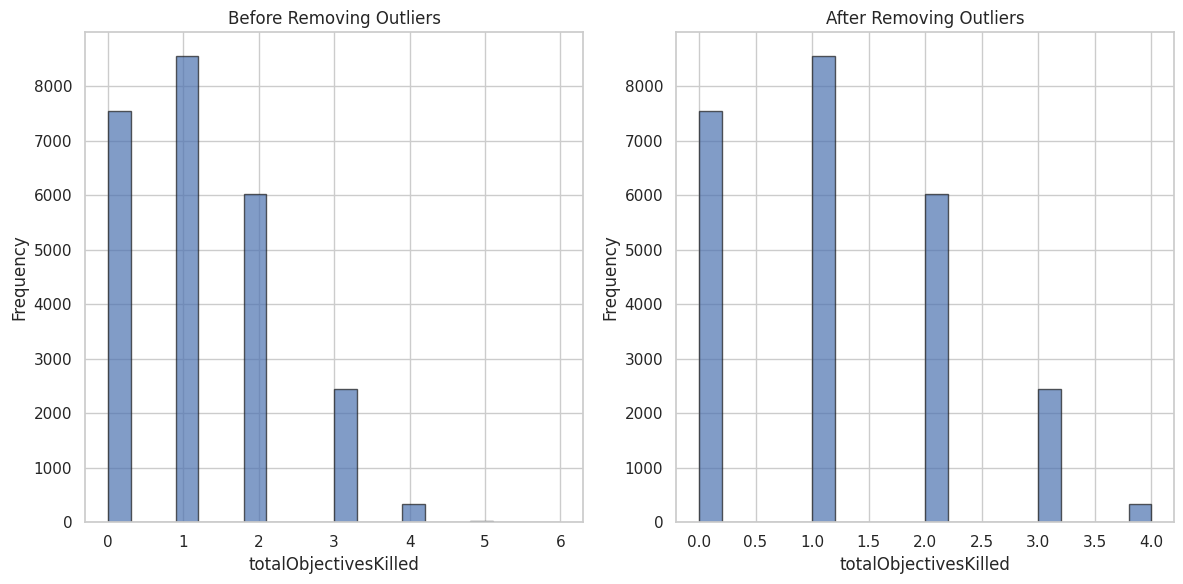

In [33]:
def plot_before_and_after(df_before: pd.DataFrame, df_after: pd.DataFrame, column_name: str) -> None:
    """
    Generates histograms to compare the distribution of a specified column 
    before and after removing outliers.

    Parameters:
    ----------
    df_before : pd.DataFrame
        The DataFrame containing the data before outlier removal.
    
    df_after : pd.DataFrame
        The DataFrame containing the data after outlier removal.
    
    column_name : str
        The name of the column to be visualized in the histograms.
    """
    
    plt.figure(figsize=(12, 6))

    # Data before removing outliers
    plt.subplot(1, 2, 1)
    plt.hist(df_before[column_name], bins=20, edgecolor='k', alpha=0.7)
    plt.title('Before Removing Outliers')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    # Data after removing outliers
    plt.subplot(1, 2, 2)
    plt.hist(df_after[column_name], bins=20, edgecolor='k', alpha=0.7)
    plt.title('After Removing Outliers')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Example usage
plot_before_and_after(df_ncolum, df_without_outliers, 'totalObjectivesKilled')


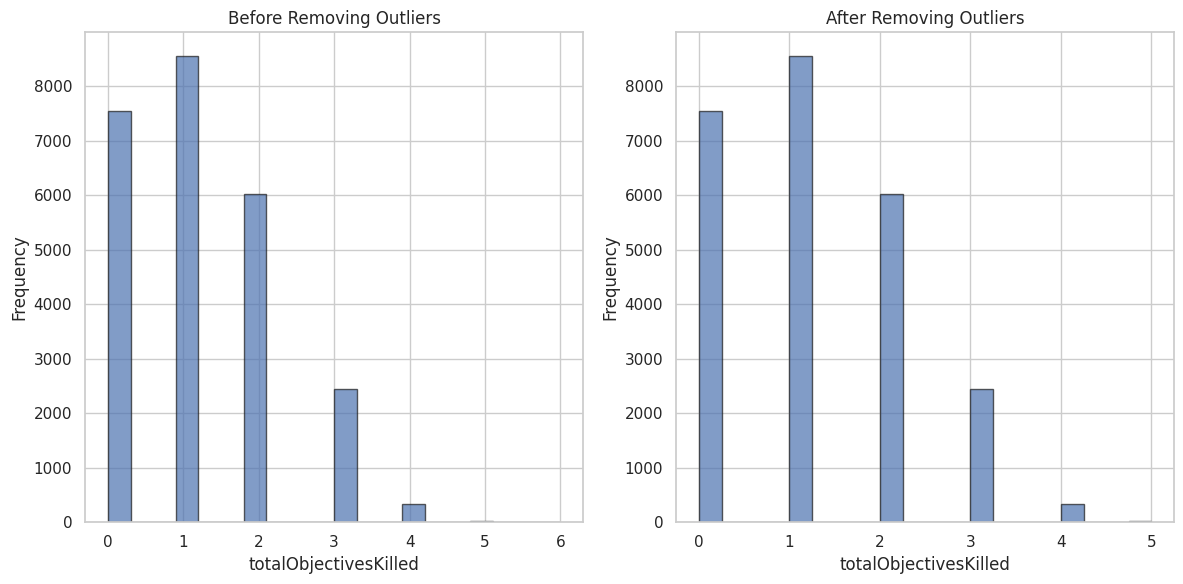

In [34]:
plot_before_and_after(df_ncolum, df_without_outliers_iqr, 'totalObjectivesKilled')


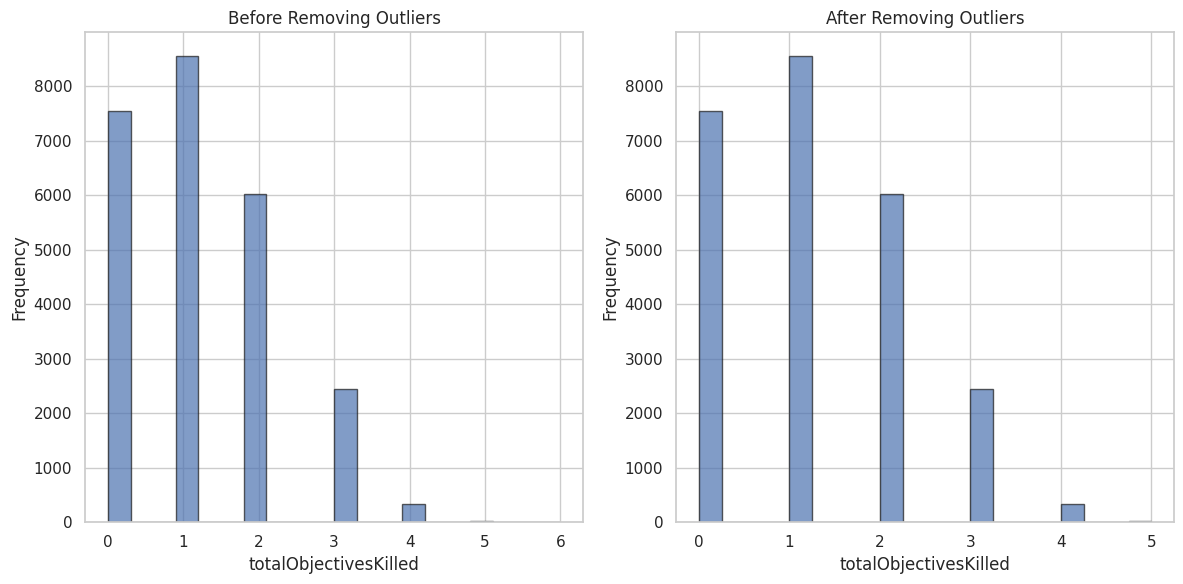

In [35]:
plot_before_and_after(df_ncolum, df_with_replaced_outliers, 'totalObjectivesKilled')


### **Summary:**

When comparing the methods (no treatment, outlier removal using IQR, replacement of outliers with KNN, and removal using Z-scores), no significant difference is observed in the distribution of the data. Even with outlier removal based on Z-scores, using a threshold of 3, the overall structure of the data remains intact. This indicates that the outliers do not have a substantial impact on the distribution, so any of the strategies can be employed without significantly altering the results.

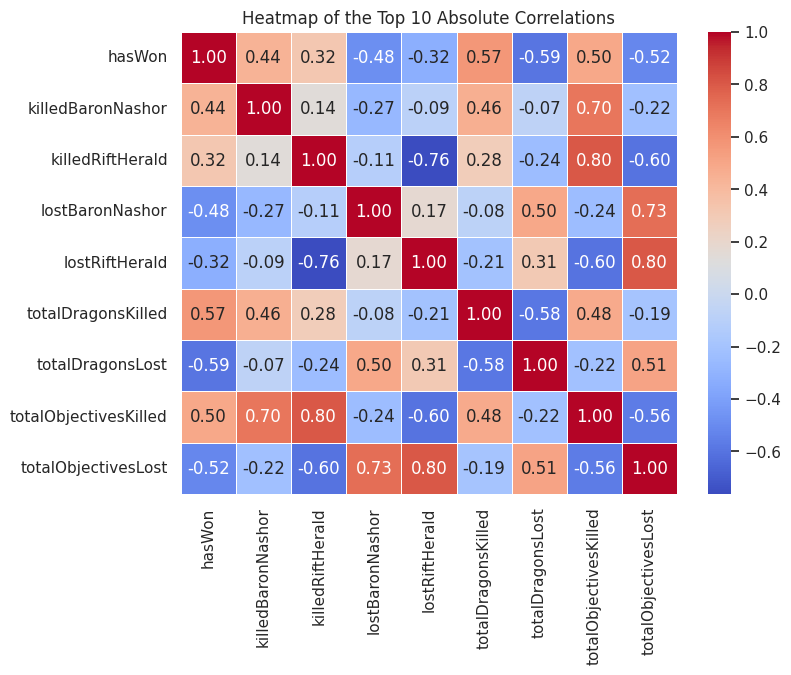

(killedRiftHerald       totalObjectivesKilled    0.804697
 totalObjectivesLost    lostRiftHerald           0.803703
 lostRiftHerald         killedRiftHerald         0.762406
 lostBaronNashor        totalObjectivesLost      0.725844
 killedBaronNashor      totalObjectivesKilled    0.702829
 killedRiftHerald       totalObjectivesLost      0.599762
 totalObjectivesKilled  lostRiftHerald           0.599561
 totalDragonsLost       hasWon                   0.593717
                        totalDragonsKilled       0.584880
 hasWon                 totalDragonsKilled       0.570796
 dtype: float64,
 Index(['hasWon', 'killedBaronNashor', 'killedRiftHerald', 'lostBaronNashor',
        'lostRiftHerald', 'totalDragonsKilled', 'totalDragonsLost',
        'totalObjectivesKilled', 'totalObjectivesLost'],
       dtype='object'))

In [36]:
def top_correlation_matrix(df: pd.DataFrame, n: int = 5) -> tuple:
    """
    Generates a heatmap of the top n absolute correlations in the given DataFrame.
    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame for which to compute and visualize the correlation matrix.
    n : int, optional
        The number of top absolute correlations to display (default is 5).
    
    Returns:
    -------
    tuple
        (top_correlations, involved_variables) - The Series of top correlations and the list of variables involved
    """
    
    # Generate the correlation matrix
    correlations = df.corr()
    
    # Get the absolute correlations in a Series format
    absolute_correlations = correlations.abs().unstack()
    
    # Remove self-correlations (diagonal elements)
    absolute_correlations = absolute_correlations[absolute_correlations < 1]
    
    # Sort the correlations in descending order and drop duplicates
    top_correlations = absolute_correlations.sort_values(ascending=False).drop_duplicates()
    
    # Ensure we take the top n unique correlations or all if fewer are available
    top_n_correlations = top_correlations.head(n)
    
    # Get the variables involved in the highest correlations
    involved_variables = top_n_correlations.index.get_level_values(0).union(
        top_n_correlations.index.get_level_values(1)
    ).unique()  # Use unique to avoid duplicates
    
    # Filter the correlation matrix to only include the involved variables
    filtered_correlations = df[involved_variables].corr()
    
    # Display the heatmap for the top n correlations
    plt.figure(figsize=(8, 6))
    sns.heatmap(filtered_correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f'Heatmap of the Top {min(n, len(top_correlations))} Absolute Correlations')
    plt.show()
    
    return top_n_correlations, involved_variables

# Example usage
top_correlation_matrix(df_with_replaced_outliers, 10)  

### **Summary:**

After analyzing the neutral objectives, it is evident that dragons have a stronger correlation with the match outcome compared to other objectives. This significant relationship suggests that killing dragons has a substantial impact on the chances of victory. Therefore, we have decided to focus our analysis on victory based on these objectives, given their relevance and influence on the final outcome of the matches.

### **How Do Dragons Affect Team Victory?**

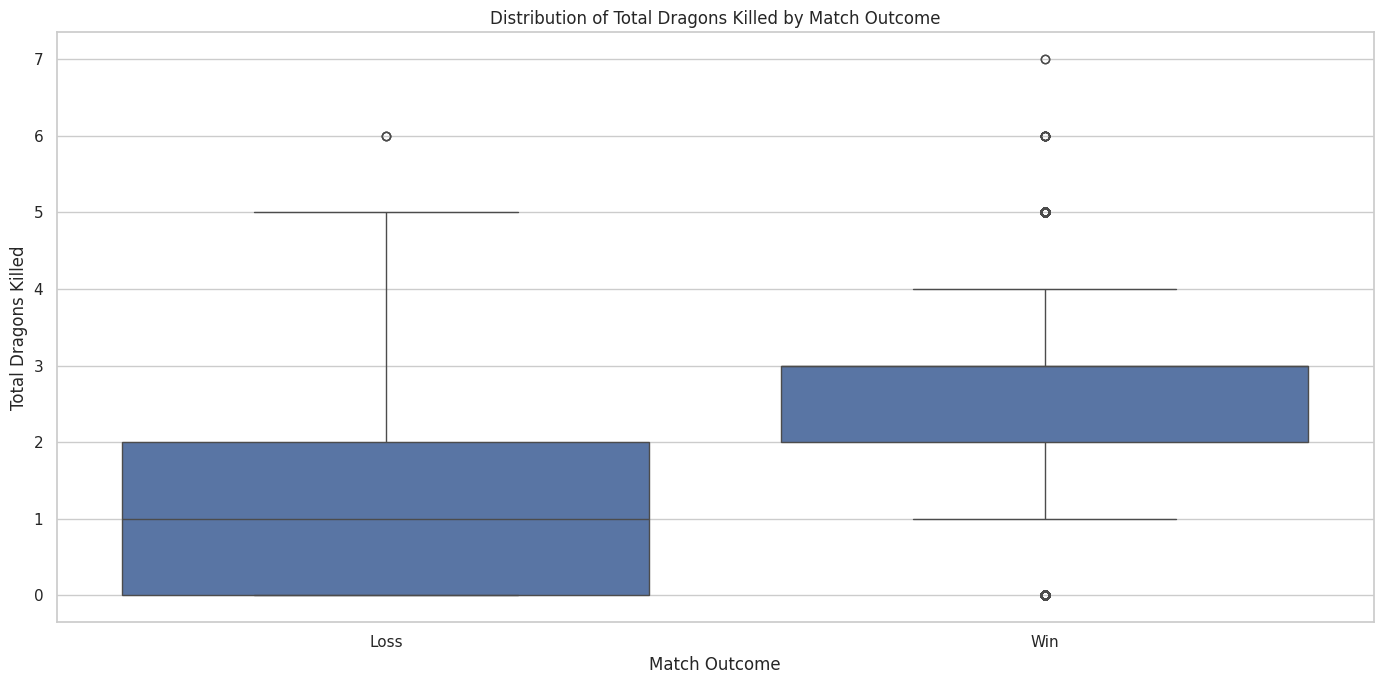

In [37]:
def dragon_victories_graph(df: pd.DataFrame) -> None:
    """
    Generates a boxplot to visualize the distribution of total dragons killed 
    based on the match outcome.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing the game data. It must include the following columns:
        - 'hasWon': Binary indicator of match outcome (0 for loss, 1 for win).
        - 'totalDragonsKilled': Total number of dragons killed in the match.

    Returns:
    -------
    None
        This function does not return any value. It displays a boxplot showing the 
        distribution of dragons killed for both outcomes (win and loss).
    
    Example:
    --------
    >>> dragon_victories_graph(df_with_replaced_outliers)
    """
    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(14, 7))
    
    # Generate the boxplot
    sns.boxplot(x='hasWon', y='totalDragonsKilled', data=df)
    
    # Customize axes and title
    plt.title('Distribution of Total Dragons Killed by Match Outcome')
    plt.xlabel('Match Outcome')
    plt.ylabel('Total Dragons Killed')
    
    plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
    
    plt.tight_layout()
    plt.show()
    
dragon_victories_graph(df_with_replaced_outliers)

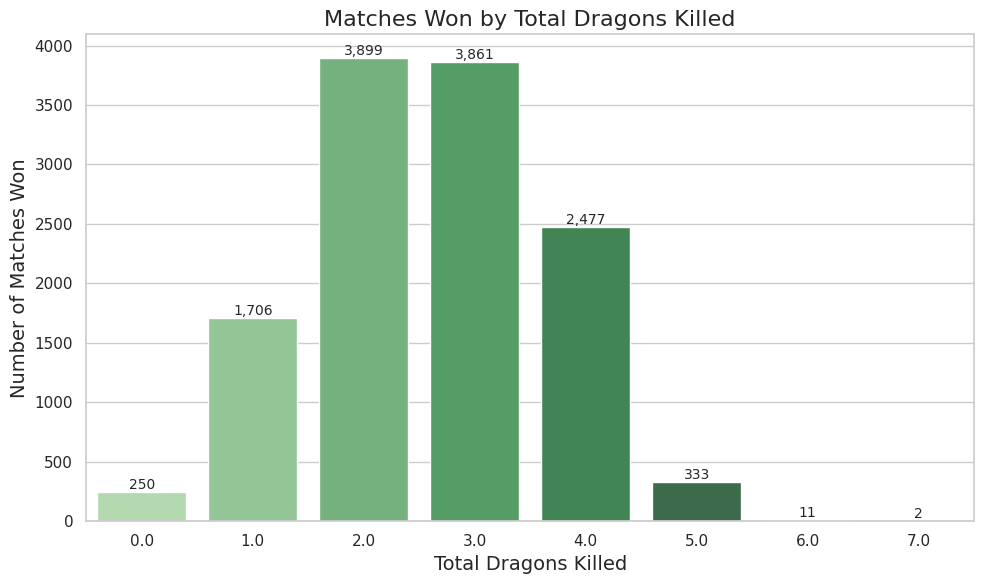

In [38]:
def dragon_win_graph(df: pd.DataFrame) -> None:
    """
    Generates a bar plot to visualize the number of matches won based on the total dragons killed.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing game data. It must include the following columns:
        - 'hasWon': Binary indicator of match outcome (0 for loss, 1 for win).
        - 'totalDragonsKilled': Total number of dragons killed in the match.

    Returns:
    -------
    None
        This function does not return any value. It displays a bar plot showing the 
        number of matches won for different numbers of dragons killed.
    
    Example:
    --------
    >>> grafico_partidas_ganadas_dragones(df_con_outliers_reemplazados)
    """
    sns.set_theme(style="whitegrid")
    
    # Group by the number of dragons killed and count wins
    df_wins_by_dragons = df[df['hasWon'] == 1].groupby('totalDragonsKilled').size().reset_index(name='partidas_ganadas')
    
    plt.figure(figsize=(10, 6))
    
    ax = sns.barplot(x='totalDragonsKilled', y='partidas_ganadas', data=df_wins_by_dragons, 
                     hue='totalDragonsKilled', palette='Greens_d', legend=False)
    
    for index, row in df_wins_by_dragons.iterrows():
        ax.text(row['totalDragonsKilled'], row['partidas_ganadas'], f'{row["partidas_ganadas"]:,.0f}', 
                ha='center', va='bottom', fontsize=10)
    
    # Customize the plot
    plt.title('Matches Won by Total Dragons Killed', fontsize=16)
    plt.xlabel('Total Dragons Killed', fontsize=14)
    plt.ylabel('Number of Matches Won', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Call the function with the DataFrame
dragon_win_graph(df_with_replaced_outliers)


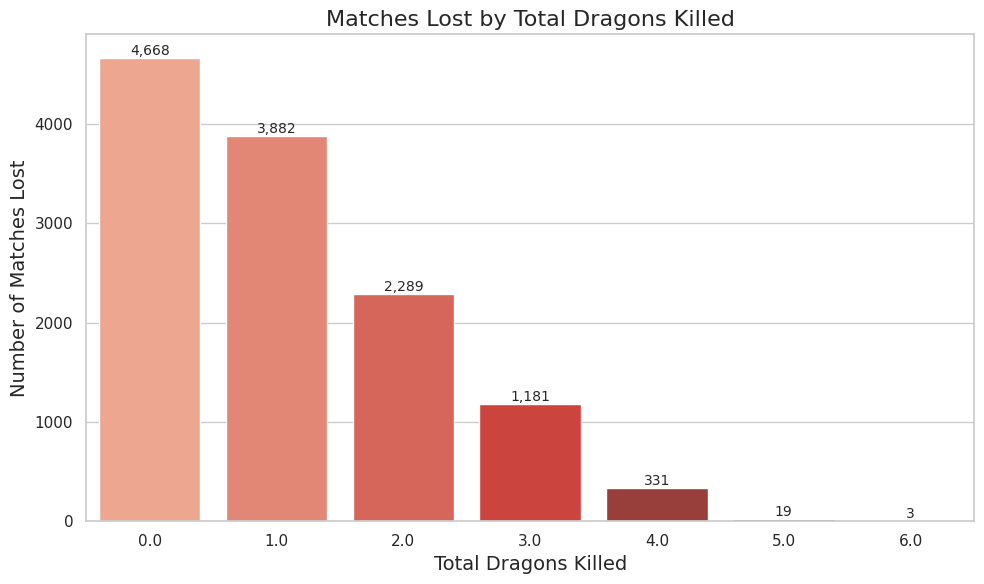

In [39]:
def dragon_loss_graph(df: pd.DataFrame) -> None:
    """
    Generates a bar plot to visualize the number of matches lost based on the total dragons killed.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing game data. It must include the following columns:
        - 'hasWon': Binary indicator of match outcome (0 for loss, 1 for win).
        - 'totalDragonsKilled': Total number of dragons killed in the match.

    Returns:
    -------
    None
        This function does not return any value. It displays a bar plot showing the 
        number of matches lost for different numbers of dragons killed.
    
    Example:
    --------
    >>> grafico_partidas_perdidas_dragones(df_con_outliers_reemplazados)
    """
    sns.set_theme(style="whitegrid")
    
    # Group by the number of dragons killed and count losses
    df_losses_by_dragons = df[df['hasWon'] == 0].groupby('totalDragonsKilled').size().reset_index(name='partidas_perdidas')
    
    plt.figure(figsize=(10, 6))
    
    ax = sns.barplot(x='totalDragonsKilled', y='partidas_perdidas', data=df_losses_by_dragons, 
                     hue='totalDragonsKilled', palette='Reds_d', legend=False)
    
    for index, row in df_losses_by_dragons.iterrows():
        ax.text(row['totalDragonsKilled'], row['partidas_perdidas'], f'{row["partidas_perdidas"]:,.0f}', 
                ha='center', va='bottom', fontsize=10)
    
    # Customize the plot
    plt.title('Matches Lost by Total Dragons Killed', fontsize=16)
    plt.xlabel('Total Dragons Killed', fontsize=14)
    plt.ylabel('Number of Matches Lost', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Call the function with the DataFrame
dragon_loss_graph(df_with_replaced_outliers)

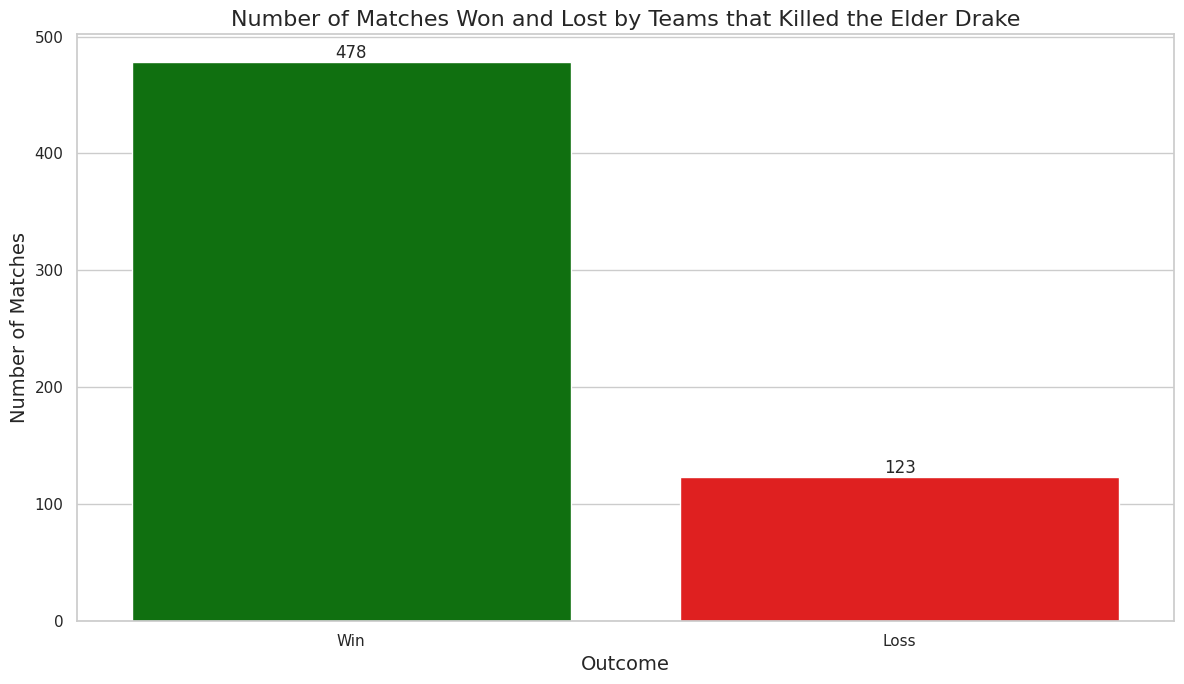

In [40]:
def elder_drake_win_loss_bar_graph(df: pd.DataFrame) -> None:
    """
    Generates a bar plot to visualize the number of matches won and lost by teams 
    that killed the Elder Drake.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing game data. It must include the following columns:
        - 'hasWon': Binary indicator of match outcome (0 for loss, 1 for win).
        - 'killedElderDrake': Number of Elder Drakes killed in the match.

    Returns:
    -------
    None
        This function does not return any value. It displays a bar plot showing the 
        number of matches won and lost by teams that killed the Elder Drake.

    Example:
    --------
    >>> elder_drake_win_loss_bar_graph(df_with_replaced_outliers)
    """
    df_elder = df[df['killedElderDrake'] > 0]
    
    # Count the number of matches won and lost
    results_count = df_elder['hasWon'].value_counts().reset_index()
    results_count.columns = ['hasWon', 'Number of Matches']
    
    # Map 'hasWon' to labels
    results_count['Outcome'] = results_count['hasWon'].map({1: 'Win', 0: 'Loss'})
    
    # Set seaborn style
    sns.set_theme(style="whitegrid")
    
    # Create the figure and axes
    plt.figure(figsize=(12, 7))
    
    # Create the bar plot with hue
    ax = sns.barplot(x='Outcome', y='Number of Matches', data=results_count,
                     hue='Outcome', palette={'Win': 'green', 'Loss': 'red'}, legend=False)
    
    # Add text labels above the bars
    for i, row in results_count.iterrows():
        ax.text(i, row['Number of Matches'] + 0.5,  
                f'{row["Number of Matches"]}', 
                ha='center', va='bottom', fontsize=12)
    
    # Configure titles and labels
    plt.title('Number of Matches Won and Lost by Teams that Killed the Elder Drake', fontsize=16)
    plt.xlabel('Outcome', fontsize=14)
    plt.ylabel('Number of Matches', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Call the function with the DataFrame
elder_drake_win_loss_bar_graph(df_with_replaced_outliers)


### **Summary:**
The data shows a direct relationship between securing neutral objectives and winning a match. Killing key objectives like the Rift Herald and dragons (fire, water, air, and earth) is strongly associated with a higher probability of victory. Among these objectives, slain dragons have the highest correlation with winning. However, in matches that extend over a long duration, the Elder Drake becomes a crucial objective that can determine the final outcome of the match. Losing these objectives significantly negatively impacts the chances of victory.

### **¿El número de asesinatos (Kills) y asistencias (Assists) durante los primeros 10 minutos de juego tiene un impacto significativo en la probabilidad de victoria de un equipo?**

In [25]:
def filtrar_juego_temprano(df, limite_tiempo=10):
    """
    Filtra los datos para considerar solo los primeros 10 minutos (600 segundos) de cada partida.
    
    :param df: DataFrame con los datos del juego
    :param limite_tiempo: Límite de tiempo en segundos (por defecto 600 para 10 minutos)
    :return: DataFrame filtrado
    """
    return df[df['frame'] <= limite_tiempo]


In [26]:
df_temprano = filtrar_juego_temprano(df)
df_temprano.head()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
14,4402345420,1790000,1,10,-155,-113,-0.2,0,1,0,...,0,0,0,0,7,5,5,14,3,2
25,4546761795,2065000,0,10,2307,96,0.2,0,1,0,...,0,0,0,0,6,3,8,11,1,1
38,4528965743,1307000,0,10,-3297,-2882,-0.6,0,1,0,...,0,0,0,0,3,6,2,11,1,1


In [45]:
# Función para agrupar asesinatos y asistencias
def agrupar_asesinatos_asistencias(df):
    """
    Agrupa los datos por equipo para calcular el total de asesinatos (kills) y asistencias (assists)
    en los primeros 10 minutos de juego.
    
    Parámetros:
        df (pd.DataFrame): DataFrame filtrado que contiene columnas de 'kills' y 'assists'.
        
    Retorna:
        pd.DataFrame: DataFrame con el total de 'kills' y 'assists' por equipo.
    """
    return df.groupby('gameId').agg({'kills': 'sum', 'assists': 'sum'}).reset_index()

In [46]:
df_agregado = agrupar_asesinatos_asistencias(df_temprano)
df_agregado.head()

,gameId,kills,assists
0,4357970300,4,5
1,4357978575,7,7
2,4358313595,3,4
3,4358316661,8,7
4,4358361767,8,8


Estandarización de características:
Estandarizamos las características `kills` y `assists` para que todas estén en la misma escala. Esto es importante cuando utilizamos técnicas de análisis que son sensibles a la magnitud de los datos, para evitar que una variable con un rango más amplio domine la relación.


In [47]:
# Función para estandarizar los datos
def estandarizar_datos(df, columnas):
    """
    Estandariza las columnas seleccionadas usando la técnica de StandardScaler.
    
    Parámetros:
        df (pd.DataFrame): DataFrame con las características que se desean estandarizar.
        columnas (list): Lista de las columnas que se desean estandarizar.
        
    Retorna:
        pd.DataFrame: DataFrame con las columnas estandarizadas.
    """
    scaler = StandardScaler()
    df[columnas] = scaler.fit_transform(df[columnas])
    return df


In [48]:
df_estandarizado = estandarizar_datos(df_agregado, ['kills', 'assists'])
df_estandarizado.head()

,gameId,kills,assists
0,4357970300,-0.640008,-0.208304
1,4357978575,0.393341,0.320997
2,4358313595,-0.984457,-0.472955
3,4358316661,0.737790,0.320997
4,4358361767,0.737790,0.585648


Tratamiento de outliers
Eliminamos o ajustamos los outliers para asegurar que nuestro análisis no esté sesgado por valores extremos que no representen el comportamiento típico del juego. Para este caso, utilizamos el método del rango intercuartílico (IQR) y/o z-score, que son herramientas comunes para detectar valores atípicos.

In [49]:
def tratar_outliers(df, columnas, metodo='zscore', umbral=3):
 """
 Trata los outliers en las columnas seleccionadas usando el método Z-score o IQR.
 
 Parámetros:
     df (pd.DataFrame): DataFrame con las columnas que se van a analizar.
     columnas (list): Lista de columnas en las que se buscarán outliers.
     metodo (str): Método a usar ('zscore' o 'iqr').
     umbral (float): Umbral para identificar outliers (solo para zscore).
     
 Retorna:
     pd.DataFrame: DataFrame sin outliers en las columnas seleccionadas.
 """
 if metodo == 'zscore':
     from scipy.stats import zscore
     df = df[(zscore(df[columnas]) < umbral).all(axis=1)]
 elif metodo == 'iqr':
     Q1 = df[columnas].quantile(0.25)
     Q3 = df[columnas].quantile(0.75)
     IQR = Q3 - Q1
     df = df[~((df[columnas] < (Q1 - 1.5 * IQR)) | (df[columnas] > (Q3 + 1.5 * IQR))).any(axis=1)]
 return df

In [50]:
df_sin_outliers = tratar_outliers(df_estandarizado, ['kills', 'assists'], metodo='iqr')
df_sin_outliers.head()

,gameId,kills,assists
0,4357970300,-0.640008,-0.208304
1,4357978575,0.393341,0.320997
2,4358313595,-0.984457,-0.472955
3,4358316661,0.737790,0.320997
4,4358361767,0.737790,0.585648


In [27]:
# Definimos la función
def agregar_estadisticas_juego(df):
    """
    Agrega las estadísticas por juego, sumando asesinatos, asistencias y determinando el resultado.
    
    :param df: DataFrame con los datos filtrados del juego
    :return: DataFrame con estadísticas agregadas por juego
    """
    estadisticas_agrupadas = df.groupby('gameId').agg({
        'kills': 'sum',
        'assists': 'sum',
        'hasWon': 'max'  # Asumimos que 'hasWon' es constante para cada gameId
    }).reset_index()
    
    estadisticas_agrupadas['Resultado'] = estadisticas_agrupadas['hasWon'].map({1: 'Victoria', 0: 'Derrota'})
    return estadisticas_agrupadas

In [28]:
df_agrupado = agregar_estadisticas_juego(df_temprano)
df_agrupado.head()

,gameId,kills,assists,hasWon,Resultado
0,4357970300,4,5,1,Victoria
1,4357978575,7,7,0,Derrota
2,4358313595,3,4,0,Derrota
3,4358316661,8,7,0,Derrota
4,4358361767,8,8,1,Victoria


In [29]:
def crear_ratios_caracteristicas(df):
    """
    Crea características adicionales basadas en ratios de asesinatos y asistencias.
    
    :param df: DataFrame con estadísticas agregadas por juego
    :return: DataFrame con características adicionales
    """
    df['ratio_asesinatos_asistencias'] = df['kills'] / (df['assists'] + 1)  # Evitamos división por cero
    df['acciones_totales'] = df['kills'] + df['assists']
    return df


In [30]:
df_caracteristicas = crear_ratios_caracteristicas(df_agrupado)
df_caracteristicas.head()

,gameId,kills,assists,hasWon,Resultado,ratio_asesinatos_asistencias,acciones_totales
0,4357970300,4,5,1,Victoria,0.666667,9
1,4357978575,7,7,0,Derrota,0.875000,14
2,4358313595,3,4,0,Derrota,0.600000,7
3,4358316661,8,7,0,Derrota,1.000000,15
4,4358361767,8,8,1,Victoria,0.888889,16


In [31]:
def manejar_valores_faltantes(df):
    """
    Maneja los valores faltantes en el DataFrame.
    
    :param df: DataFrame con posibles valores faltantes
    :return: DataFrame con valores faltantes imputados
    """
    # Seleccionamos solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Imputamos los valores faltantes en las columnas numéricas
    imputador = SimpleImputer(strategy='mean')
    df[columnas_numericas] = imputador.fit_transform(df[columnas_numericas])
    
    return df

In [32]:
df_imputado = manejar_valores_faltantes(df_caracteristicas)
df_imputado.head()

,gameId,kills,assists,hasWon,Resultado,ratio_asesinatos_asistencias,acciones_totales
0,4.357970e+09,4.0,5.0,1.0,Victoria,0.666667,9.0
1,4.357979e+09,7.0,7.0,0.0,Derrota,0.875000,14.0
2,4.358314e+09,3.0,4.0,0.0,Derrota,0.600000,7.0
3,4.358317e+09,8.0,7.0,0.0,Derrota,1.000000,15.0
4,4.358362e+09,8.0,8.0,1.0,Victoria,0.888889,16.0


In [33]:
def escalar_caracteristicas(df):
    """
    Escala las características numéricas del DataFrame.
    
    :param df: DataFrame con características sin escalar
    :return: DataFrame con características escaladas
    """
    escalador = StandardScaler()
    caracteristicas_numericas = ['kills', 'assists', 'ratio_asesinatos_asistencias', 'acciones_totales']
    df[caracteristicas_numericas] = escalador.fit_transform(df[caracteristicas_numericas])
    return df


In [34]:
df_escalado = escalar_caracteristicas(df_imputado)
df_escalado.head()

,gameId,kills,assists,hasWon,Resultado,ratio_asesinatos_asistencias,acciones_totales
0,4.357970e+09,-0.640008,-0.208304,1.0,Victoria,-0.626495,-0.417883
1,4.357979e+09,0.393341,0.320997,0.0,Derrota,-0.164453,0.372021
2,4.358314e+09,-0.984457,-0.472955,0.0,Derrota,-0.774349,-0.733845
3,4.358317e+09,0.737790,0.320997,0.0,Derrota,0.112773,0.530002
4,4.358362e+09,0.737790,0.585648,1.0,Victoria,-0.133650,0.687983


In [35]:
def codificar_variables_categoricas(df):
    """
    Codifica variables categóricas.
    
    :param df: DataFrame con variables categóricas
    :return: DataFrame con variables categóricas codificadas
    """
    df = pd.get_dummies(df, columns=['Resultado'], drop_first=True)
    return df


In [36]:
df_codificado = codificar_variables_categoricas(df_escalado)
df_codificado.head()

,gameId,kills,assists,hasWon,ratio_asesinatos_asistencias,acciones_totales,Resultado_Victoria
0,4.357970e+09,-0.640008,-0.208304,1.0,-0.626495,-0.417883,True
1,4.357979e+09,0.393341,0.320997,0.0,-0.164453,0.372021,False
2,4.358314e+09,-0.984457,-0.472955,0.0,-0.774349,-0.733845,False
3,4.358317e+09,0.737790,0.320997,0.0,0.112773,0.530002,False
4,4.358362e+09,0.737790,0.585648,1.0,-0.133650,0.687983,True


In [37]:
def preparar_datos(df, limite_tiempo=10):
    """
    Función principal que ejecuta todo el proceso de preparación de datos.
    
    :param df: DataFrame original con todos los datos del juego
    :param limite_tiempo: Límite de tiempo para filtrar el juego temprano
    :return: DataFrame preparado para el análisis o modelado
    """
    df_temprano = filtrar_juego_temprano(df, limite_tiempo)
    df_agrupado = agregar_estadisticas_juego(df_temprano)
    df_caracteristicas = crear_ratios_caracteristicas(df_agrupado)
    df_imputado = manejar_valores_faltantes(df_caracteristicas)
    df_escalado = escalar_caracteristicas(df_imputado)
    df_codificado = codificar_variables_categoricas(df_escalado)
    
    return df_codificado

Visualización de la correlación
Para evaluar las relaciones entre las características clave (como asesinatos, asistencias y otras estadísticas del juego) y
la probabilidad de victoria, graficamos una matriz de correlación. Esta visualización nos permite identificar 
rápidamente cuáles son las variables más importantes que podrían influir en el resultado final.

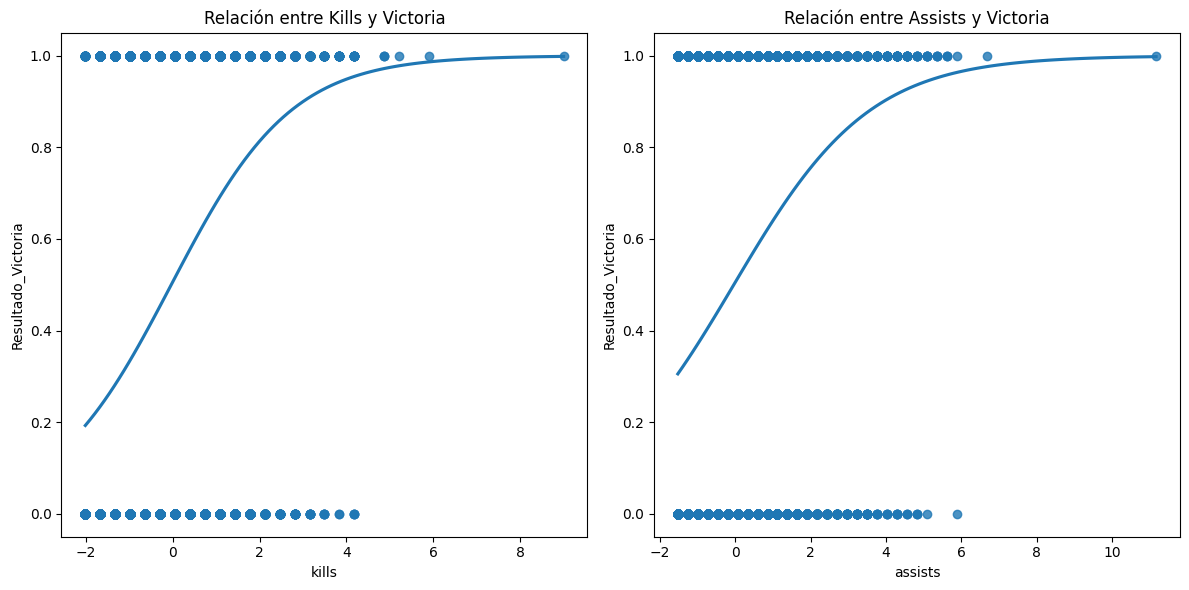

In [38]:
def graficar_correlacion(df):
    """
    Crea un gráfico de dispersión con regresión para visualizar la relación entre las kills,
    assists y el resultado (Victoria o Derrota) en los primeros 10 minutos de juego.
    
    :param df: DataFrame con los datos preparados
    """
    # Aseguramos que 'Resultado_Victoria' esté en formato numérico
    if 'Resultado_Victoria' not in df.columns:
        df['Resultado_Victoria'] = df['hasWon']
    
    # Creamos un gráfico de dispersión para 'kills' y 'assists' separados por 'Resultado'
    plt.figure(figsize=(12, 6))
    
    # Graficamos la relación entre kills y el resultado
    plt.subplot(1, 2, 1)
    sns.regplot(x='kills', y='Resultado_Victoria', data=df, logistic=True, ci=None)
    plt.title('Relación entre Kills y Victoria')
    
    # Graficamos la relación entre assists y el resultado
    plt.subplot(1, 2, 2)
    sns.regplot(x='assists', y='Resultado_Victoria', data=df, logistic=True, ci=None)
    plt.title('Relación entre Assists y Victoria')
    
    plt.tight_layout()
    plt.show()

# Ejecutamos el flujo de preparación de datos y graficamos la correlación
df_preparado = preparar_datos(df, limite_tiempo=10)
graficar_correlacion(df_preparado)

### **Resumen:**



el número de asesinatos (kills) y asistencias (assists) durante los primeros 10 minutos del juego parece tener un impacto significativo en la probabilidad de victoria del equipo. A medida que los valores de "kills" y "assists" aumentan, la probabilidad de victoria se incrementa de manera notable.

### **¿Los equipos que obtienen una ventaja en asesinatos y asistencias en los primeros 10 minutos tienen una mayor probabilidad de ampliar esa ventaja a lo largo de la partida?**



In [82]:
def filtrar_juego_temprano_snowball(df, limite_tiempo=10):
    """
    Filtra los datos para considerar solo los primeros 10 minutos de cada partida.
    """
    return df[df['frame'] <= limite_tiempo]

df_temprano_snowball = filtrar_juego_temprano_snowball(df)
df_temprano_snowball.head()


,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
14,4402345420,1790000,1,10,-155,-113,-0.2,0,1,0,...,0,0,0,0,7,5,5,14,3,2
25,4546761795,2065000,0,10,2307,96,0.2,0,1,0,...,0,0,0,0,6,3,8,11,1,1
38,4528965743,1307000,0,10,-3297,-2882,-0.6,0,1,0,...,0,0,0,0,3,6,2,11,1,1


Esta función calcula y agrega estadísticas de kills y assists en los primeros 10 minutos del juego. Permite evaluar la ventaja inicial de los equipos, crucial para el análisis del snowball.(efecto bola de nieve)

In [84]:
def agregar_estadisticas_snowball(df):
    """
    Calcula la ventaja inicial en asesinatos y asistencias.
    """
    ventaja = df.groupby('gameId').agg({
        'kills': 'sum',
        'assists': 'sum'
    }).reset_index()
    
    ventaja['ventaja_kills'] = ventaja['kills'].diff().fillna(0)
    ventaja['ventaja_assists'] = ventaja['assists'].diff().fillna(0)
    
    df = df.merge(ventaja[['gameId', 'ventaja_kills', 'ventaja_assists']], on='gameId', how='left')
    return df

df_estadisticas = agregar_estadisticas_snowball(df_temprano)
df_estadisticas.head()


,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost,ventaja_kills,ventaja_assists
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,4,7,5,21,3,5,0.0,2.0
1,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,6,6,7,15,4,1,1.0,5.0
2,4402345420,1790000,1,10,-155,-113,-0.2,0,1,0,...,0,0,7,5,5,14,3,2,-2.0,-1.0
3,4546761795,2065000,0,10,2307,96,0.2,0,1,0,...,0,0,6,3,8,11,1,1,-1.0,1.0
4,4528965743,1307000,0,10,-3297,-2882,-0.6,0,1,0,...,0,0,3,6,2,11,1,1,-9.0,-6.0


In [85]:
def crear_ratios_snowball_acumulativos(df):
    """
    Calcula la ventaja acumulativa en asesinatos y asistencias a lo largo de la partida.
    """
    df['ventaja_kills'] = df.groupby('gameId')['kills'].cumsum()
    df['ventaja_assists'] = df.groupby('gameId')['assists'].cumsum()
    
    return df

# Llamar a la función y mostrar el resultado
df_ratios_acumulativos = crear_ratios_snowball_acumulativos(df_estadisticas)
print("Ventaja Kills Acumulativa:\n", df_ratios_acumulativos[['gameId', 'kills', 'ventaja_kills']].head())
print("Ventaja Assists Acumulativa:\n", df_ratios_acumulativos[['gameId', 'assists', 'ventaja_assists']].head())


Ventaja Kills Acumulativa:
        gameId  kills  ventaja_kills
0  4546233126      4              4
1  4438212663      6              6
2  4402345420      7              7
3  4546761795      6              6
4  4528965743      3              3
Ventaja Assists Acumulativa:
        gameId  assists  ventaja_assists
0  4546233126        5                5
1  4438212663        7                7
2  4402345420        5                5
3  4546761795        8                8
4  4528965743        2                2


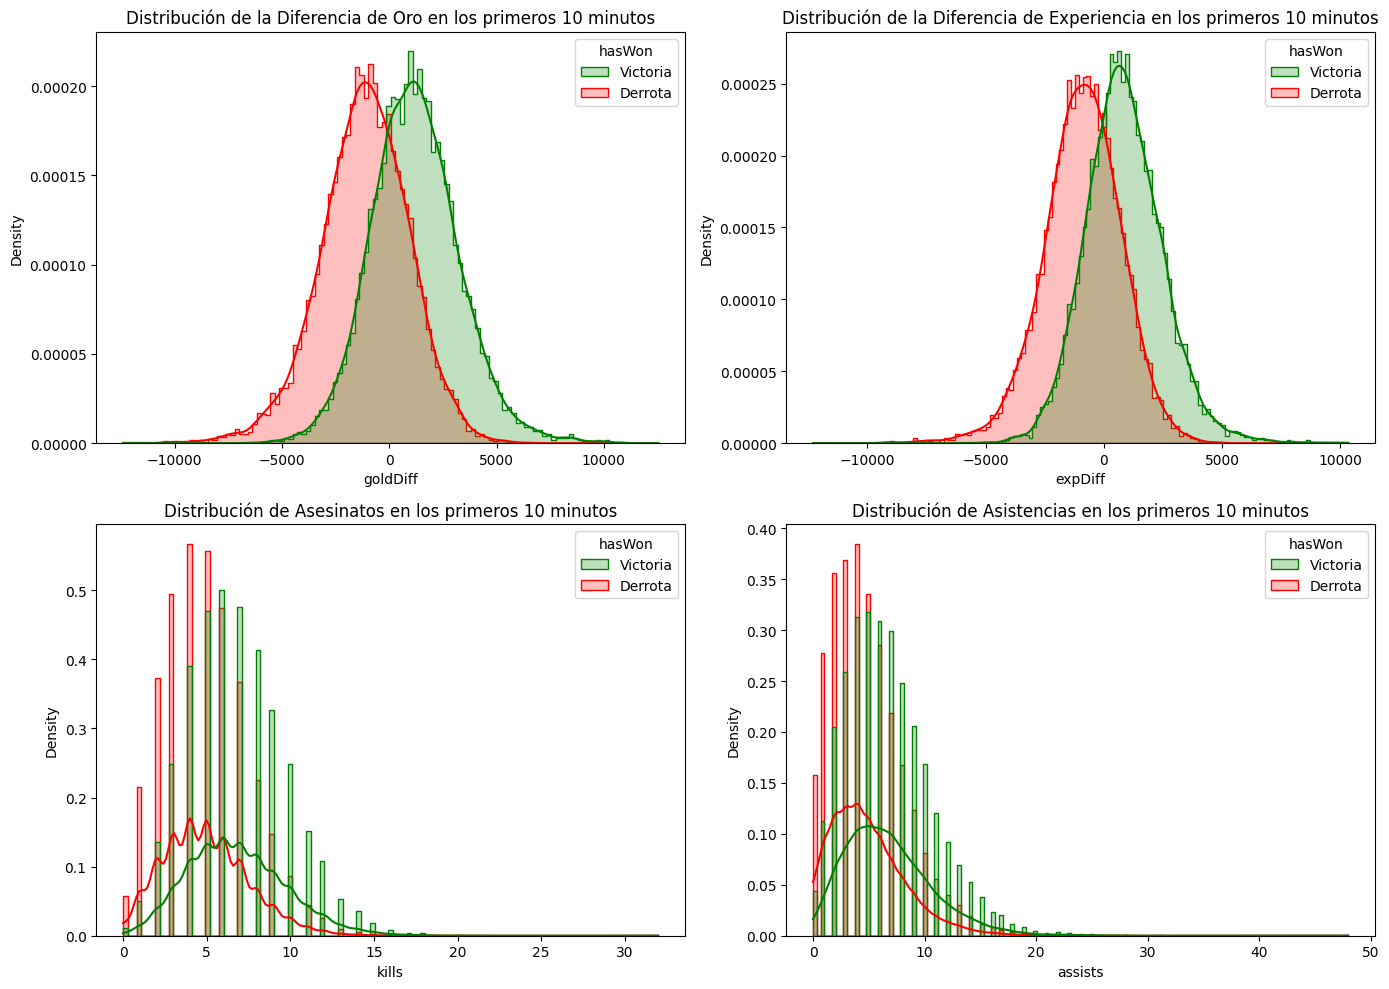

In [65]:
def graficar_histogramas_snowball(df, limite_tiempo=10):
    """
    Función que filtra los datos para los primeros minutos de la partida y genera histogramas
    para visualizar cómo se distribuyen las ventajas tempranas en función de si el equipo ganó o perdió la partida.
    Las métricas consideradas son:
    - Diferencia de oro (goldDiff)
    - Diferencia de experiencia (expDiff)
    - Asesinatos (kills)
    - Asistencias (assists)
    
    Parámetros:
    - df (DataFrame): DataFrame con los datos de la partida.
    - limite_tiempo (int): Límite de tiempo en minutos para considerar como juego temprano (default: 10 minutos).
    """
    
    # Filtrar los datos para los primeros minutos
    df_temprano = filtrar_juego_temprano_snowball(df, limite_tiempo).copy()

    # Mapear los valores de 'hasWon' a etiquetas de texto
    df_temprano['hasWon'] = df_temprano['hasWon'].map({0: 'Derrota', 1: 'Victoria'})

    # Colores para las secciones del gráfico
    colors = {'Derrota': 'red', 'Victoria': 'green'}

    plt.figure(figsize=(14, 10))

    # Histograma de diferencia de oro
    plt.subplot(2, 2, 1)
    sns.histplot(data=df_temprano, x='goldDiff', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribución de la Diferencia de Oro en los primeros {limite_tiempo} minutos')

    # Histograma de diferencia de experiencia
    plt.subplot(2, 2, 2)
    sns.histplot(data=df_temprano, x='expDiff', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribución de la Diferencia de Experiencia en los primeros {limite_tiempo} minutos')

    # Histograma de asesinatos
    plt.subplot(2, 2, 3)
    sns.histplot(data=df_temprano, x='kills', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribución de Asesinatos en los primeros {limite_tiempo} minutos')

    # Histograma de asistencias
    plt.subplot(2, 2, 4)
    sns.histplot(data=df_temprano, x='assists', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribución de Asistencias en los primeros {limite_tiempo} minutos')

    plt.tight_layout()
    plt.show()

# Llamada a la función con los datos y el límite de tiempo de 10 minutos
graficar_histogramas_snowball(df, limite_tiempo=10)


Se analizó la correlación entre las ventajas en kills y assists en los primeros 10 minutos y el resultado final.
Los resultados mostraron una fuerte correlación positiva entre ventaja_kills y hasWon, mientras que ventaja_assists presentó una correlación más baja.

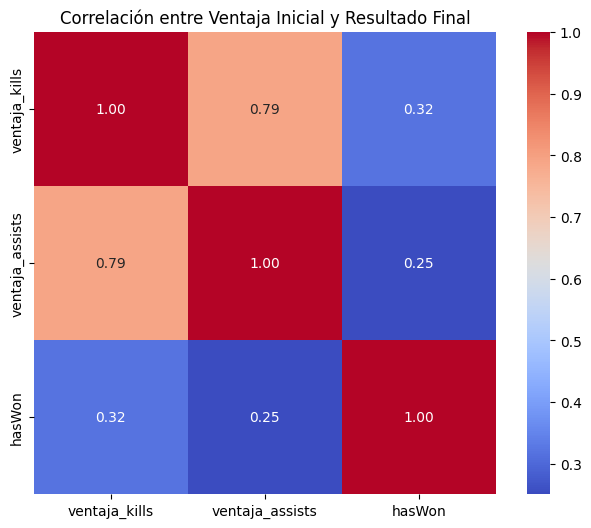

In [87]:

def analizar_correlacion(df):
    """
    Analiza la correlación entre la ventaja inicial y el resultado final.
    """
    # Asegúrate de que el DataFrame tenga las columnas correctas
    if 'ventaja_kills' in df.columns and 'ventaja_assists' in df.columns and 'hasWon' in df.columns:
        # Calcula la correlación
        correlacion = df[['ventaja_kills', 'ventaja_assists', 'hasWon']].corr()

        # Configura el gráfico
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True)
        plt.title('Correlación entre Ventaja Inicial y Resultado Final')
        plt.show()
    else:
        print("Error: El DataFrame no contiene las columnas requeridas.")

# Llamar a la función y mostrar el resultado
analizar_correlacion(df_ratios_acumulativos)  # Asegúrate de usar el DataFrame correcto aquí


### **Resumen:**


La diferencia de oro (goldDiff) y la diferencia de experiencia (expDiff) en los primeros 10 minutos del juego parecen ser factores clave que afectan el resultado de una partida. Los equipos que logran obtener una mayor ventaja en oro y experiencia durante este tiempo tienden a tener una probabilidad más alta de ganar. Además, los asesinatos (kills) y asistencias (assists) en esta etapa temprana del juego también están correlacionados con el éxito posterior, ya que los equipos que logran asegurar más eliminaciones y colaboraciones tempranas tienen una tendencia mayor a consolidar la ventaja y llevarse la victoria.

### **Time series prediction**

### **Variable Selection:**

In [79]:
def select_relevant_columns(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Selects relevant columns from the DataFrame for prediction.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the game data.

    columns : list
        A list of column names to be selected.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing only the selected columns.
    """
    # Select the relevant columns
    df_selected = df[columns]
    
    return df_selected


We select the variables that we wish to use for building the model.

**assert**

In [80]:
# Create a test DataFrame
data = {
    'goldDiff': [100, 200, -50],
    'expDiff': [150, 300, -100],
    'champLevelDiff': [1, 0, -1],
    'isFirstTower': [1, 0, 1],
    'isFirstBlood': [1, 1, 0],
    'killedFireDrake': [1, 2, 0],
    'killedWaterDrake': [0, 1, 0],
    'killedAirDrake': [1, 1, 0],
    'killedEarthDrake': [0, 1, 0],
    'killedElderDrake': [1, 0, 0],
    'killedBaronNashor': [0, 1, 0],
    'killedRiftHerald': [1, 0, 0],
    'hasWon': [1, 0, 1]
}

# Create the DataFrame
df_test = pd.DataFrame(data)

# Define the columns of interest
columns_of_interest = [
    'goldDiff', 'expDiff', 'champLevelDiff', 'isFirstTower', 
    'isFirstBlood', 'killedFireDrake', 'killedWaterDrake', 
    'killedAirDrake', 'killedEarthDrake', 'killedElderDrake', 
    'killedBaronNashor', 'killedRiftHerald', 'hasWon'
]

# Apply the function
df_selected = select_relevant_columns(df_test, columns_of_interest)

# Test that the selected columns are as expected
assert df_selected.shape[1] == len(columns_of_interest), "The number of selected columns does not match the expected count."
assert all(column in df_selected.columns for column in columns_of_interest), "Not all expected columns were selected."

**Application of the Function**

In [81]:
# Define the columns of interest
columns_of_interest = [
    'frame', 'gameDuration',  
    'isFirstTower', 
    'isFirstBlood', 'killedFireDrake', 'killedWaterDrake', 
    'killedAirDrake', 'killedEarthDrake', 'killedElderDrake', 
    'killedBaronNashor', 'killedRiftHerald', 'hasWon'
]

# Select the relevant columns
df_selected = select_relevant_columns(df, columns_of_interest)

# View the result
df_selected.head()


,frame,gameDuration,isFirstTower,isFirstBlood,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,killedBaronNashor,killedRiftHerald,hasWon
0,10,1443000,0,1,0,0,0,1,0,0,0,1
1,12,1443000,0,1,0,0,0,1,0,0,0,1
2,14,1443000,1,1,0,0,0,1,0,0,0,1
3,16,1443000,1,1,0,0,0,1,0,0,0,1
4,18,1443000,1,1,1,0,0,1,0,0,0,1


### **Outlier Treatment:**

Outlier treatment is performed to improve the model's accuracy in the future.

In [97]:
def remove_outliers_iqr(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Removes outliers from specified columns in the DataFrame using the IQR method.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame from which to remove outliers.
    
    columns : list
        The list of column names in which to detect and remove outliers.

    Returns:
    -------
    pd.DataFrame
        A DataFrame without the outliers from the specified columns.
    """
    df_cleaned = df.copy()
    
    for column in columns:
        # Calculate the first and third quartile
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Limits for detecting outliers
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Filter data to remove outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_limit) & (df_cleaned[column] <= upper_limit)]
        
        # Print limits and quartiles for debugging
        print(f"{column} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower limit: {lower_limit}, Upper limit: {upper_limit}")

    return df_cleaned

**assert**

In [99]:
columns_of_interest = [
    'gameDuration',  
    'goldDiff', 'expDiff', 'champLevelDiff', 'isFirstTower', 
    'isFirstBlood', 'killedFireDrake', 'killedWaterDrake', 
    'killedAirDrake', 'killedEarthDrake', 'killedElderDrake', 
    'killedBaronNashor', 'killedRiftHerald', 'hasWon'
]

# Example DataFrame (replace this with your actual DataFrame)
data = {
    'gameDuration': [3000, 3500, 4000, 2500, 5000],
    'goldDiff': [100, 200, -50, 300, 10000],
    'expDiff': [150, 300, -100, 500, -150],
    'champLevelDiff': [1, 0, -1, 2, -2],
    'isFirstTower': [1, 0, 1, 1, 0],
    'isFirstBlood': [1, 1, 0, 1, 0],
    'killedFireDrake': [1, 2, 0, 1, 5],
    'killedWaterDrake': [0, 1, 0, 0, 0],
    'killedAirDrake': [1, 1, 0, 1, 0],
    'killedEarthDrake': [0, 1, 0, 0, 0],
    'killedElderDrake': [1, 0, 0, 0, 0],
    'killedBaronNashor': [0, 1, 0, 0, 2],
    'killedRiftHerald': [1, 0, 0, 1, 0],
    'hasWon': [1, 0, 1, 0, 1]
}

# Create the DataFrame
df_test = pd.DataFrame(data)

# Apply the function to remove outliers
df_cleaned = remove_outliers_iqr(df_test, columns_of_interest)

# After removing outliers, recalculate limits and check assertions
for column in columns_of_interest:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Print limits and cleaned column values for debugging
    print(f"{column} - Lower limit: {lower_limit}, Upper limit: {upper_limit}")
    print(f"{column} - Min in cleaned: {df_cleaned[column].min()}, Max in cleaned: {df_cleaned[column].max()}")
    
    # Check that the minimum and maximum values in the cleaned DataFrame fall within the limits
    assert df_cleaned[column].min() >= lower_limit, f"Outliers in {column} were not removed properly: min value {df_cleaned[column].min()} is below {lower_limit}."
    assert df_cleaned[column].max() <= upper_limit, f"Outliers in {column} were not removed properly: max value {df_cleaned[column].max()} is above {upper_limit}."


gameDuration - Q1: 3000.0, Q3: 4000.0, IQR: 1000.0, Lower limit: 1500.0, Upper limit: 5500.0
goldDiff - Q1: 100.0, Q3: 300.0, IQR: 200.0, Lower limit: -200.0, Upper limit: 600.0
expDiff - Q1: 87.5, Q3: 350.0, IQR: 262.5, Lower limit: -306.25, Upper limit: 743.75
champLevelDiff - Q1: -0.25, Q3: 1.25, IQR: 1.5, Lower limit: -2.5, Upper limit: 3.5
isFirstTower - Q1: 0.75, Q3: 1.0, IQR: 0.25, Lower limit: 0.375, Upper limit: 1.375
isFirstBlood - Q1: 0.5, Q3: 1.0, IQR: 0.5, Lower limit: -0.25, Upper limit: 1.75
killedFireDrake - Q1: 0.5, Q3: 1.0, IQR: 0.5, Lower limit: -0.25, Upper limit: 1.75
killedWaterDrake - Q1: 0.0, Q3: 0.0, IQR: 0.0, Lower limit: 0.0, Upper limit: 0.0
killedAirDrake - Q1: 0.5, Q3: 1.0, IQR: 0.5, Lower limit: -0.25, Upper limit: 1.75
killedEarthDrake - Q1: 0.0, Q3: 0.0, IQR: 0.0, Lower limit: 0.0, Upper limit: 0.0
killedElderDrake - Q1: 0.0, Q3: 0.5, IQR: 0.5, Lower limit: -0.75, Upper limit: 1.25
killedBaronNashor - Q1: 0.0, Q3: 0.0, IQR: 0.0, Lower limit: 0.0, Upper 

**Application of the Function**

In [100]:
columns_of_interest = [
    'gameDuration',  
    'isFirstTower', 
    'isFirstBlood', 'killedFireDrake', 'killedWaterDrake', 
    'killedAirDrake', 'killedEarthDrake', 'killedElderDrake', 
    'killedBaronNashor', 'killedRiftHerald'
]

df_cleaned = remove_outliers_iqr(df_selected, columns_of_interest)

gameDuration - Q1: 1532000.0, Q3: 2025000.0, IQR: 493000.0, Lower limit: 792500.0, Upper limit: 2764500.0
isFirstTower - Q1: 0.0, Q3: 1.0, IQR: 1.0, Lower limit: -1.5, Upper limit: 2.5
isFirstBlood - Q1: 1.0, Q3: 1.0, IQR: 0.0, Lower limit: 1.0, Upper limit: 1.0
killedFireDrake - Q1: 0.0, Q3: 1.0, IQR: 1.0, Lower limit: -1.5, Upper limit: 2.5
killedWaterDrake - Q1: 0.0, Q3: 1.0, IQR: 1.0, Lower limit: -1.5, Upper limit: 2.5
killedAirDrake - Q1: 0.0, Q3: 1.0, IQR: 1.0, Lower limit: -1.5, Upper limit: 2.5
killedEarthDrake - Q1: 0.0, Q3: 1.0, IQR: 1.0, Lower limit: -1.5, Upper limit: 2.5
killedElderDrake - Q1: 0.0, Q3: 0.0, IQR: 0.0, Lower limit: 0.0, Upper limit: 0.0
killedBaronNashor - Q1: 0.0, Q3: 0.0, IQR: 0.0, Lower limit: 0.0, Upper limit: 0.0
killedRiftHerald - Q1: 0.0, Q3: 1.0, IQR: 1.0, Lower limit: -1.5, Upper limit: 2.5


### **Data Scaling:**

Data scaling is essential in machine learning as it ensures that features contribute equally to the model. Without scaling, features with larger ranges can disproportionately affect the model's performance, leading to slower convergence and less accurate predictions. By normalizing or standardizing the data, we enhance the model's learning efficiency and overall accuracy.

In [109]:
def scale_data(df: pd.DataFrame, columns: list, method='minmax') -> pd.DataFrame:
    """
    Scales the specified columns in a DataFrame using either MinMax or Standard scaling.
    
    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the data to scale.
    columns : list
        List of column names to scale.
    method : str, optional
        Scaling method to use ('minmax' or 'standard', default is 'minmax').
        
    Returns:
    -------
    pd.DataFrame
        A new DataFrame with scaled values in the specified columns.
    """
    df_scaled = df.copy()
    
    if method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Method should be either 'minmax' or 'standard'.")
        
    # Scale the specified columns
    df_scaled[columns] = scaler.fit_transform(df[columns])
    
    return df_scaled, scaler

**assert**

In [112]:

# Sample data
data = {
    'gameDuration': [3000, 3500, 4000, 2500, 5000],
    'isFirstTower': [1, 0, 1, 1, 0],
    'isFirstBlood': [1, 1, 0, 1, 0],
    'killedFireDrake': [1, 2, 0, 1, 5],
    'killedWaterDrake': [0, 1, 0, 0, 0],
    'killedAirDrake': [1, 1, 0, 1, 0],
    'killedEarthDrake': [0, 1, 0, 0, 0],
    'killedElderDrake': [1, 0, 0, 3, 3],
    'killedBaronNashor': [0, 1, 0, 0, 2],
    'killedRiftHerald': [1, 0, 0, 1, 0],
    'hasWon': [1, 0, 1, 0, 1]
}
df_test = pd.DataFrame(data)

# Define columns to scale
columns_to_scale = [
    'gameDuration', 'isFirstTower', 'isFirstBlood', 
    'killedFireDrake', 'killedWaterDrake', 'killedAirDrake',
    'killedEarthDrake', 'killedElderDrake', 'killedBaronNashor',
    'killedRiftHerald'
]

# Test standard scaling
print("\nTesting Standard Scaling:")
df_scaled, scaler = scale_data(df_test, columns_to_scale, method='standard')

# Set appropriate tolerance for small datasets
rtol = 1e-1  # Relative tolerance
atol = 1e-1  # Absolute tolerance

for column in columns_to_scale:
    original_mean = df_test[column].mean()
    original_std = df_test[column].std()
    scaled_mean = df_scaled[column].mean()
    scaled_std = df_scaled[column].std()
    
    print(f"\n{column}:")
    print(f"Original - Mean: {original_mean:.4f}, Std: {original_std:.4f}")
    print(f"Scaled   - Mean: {scaled_mean:.4f}, Std: {scaled_std:.4f}")
    
    # More tolerant assertions
    assert np.isclose(scaled_mean, 0, rtol=rtol, atol=atol), \
        f"Standard scaling failed for '{column}': mean is not close enough to 0"
    assert np.isclose(scaled_std, 1, rtol=rtol, atol=atol), \
        f"Standard scaling failed for '{column}': standard deviation is not close enough to 1"

# Test minmax scaling
print("\nTesting MinMax Scaling:")
df_scaled, scaler = scale_data(df_test, columns_to_scale, method='minmax')

for column in columns_to_scale:
    scaled_min = df_scaled[column].min()
    scaled_max = df_scaled[column].max()
    
    print(f"\n{column}:")
    print(f"Scaled - Min: {scaled_min:.4f}, Max: {scaled_max:.4f}")
    
    assert np.isclose(scaled_min, 0, rtol=rtol, atol=atol), \
        f"MinMax scaling failed for '{column}': minimum is not close enough to 0"
    assert np.isclose(scaled_max, 1, rtol=rtol, atol=atol), \
        f"MinMax scaling failed for '{column}': maximum is not close enough to 1"

# Test invalid method
try:
    df_scaled, scaler = scale_data(df_test, columns_to_scale, method='invalid')
    assert False, "Should have raised ValueError for invalid method"
except ValueError:
    print("\nSuccessfully caught invalid method error")

print("\nAll tests passed successfully!")


Testing Standard Scaling:

gameDuration:
Original - Mean: 3600.0000, Std: 961.7692
Scaled   - Mean: 0.0000, Std: 1.1180

isFirstTower:
Original - Mean: 0.6000, Std: 0.5477
Scaled   - Mean: 0.0000, Std: 1.1180

isFirstBlood:
Original - Mean: 0.6000, Std: 0.5477
Scaled   - Mean: 0.0000, Std: 1.1180

killedFireDrake:
Original - Mean: 1.8000, Std: 1.9235
Scaled   - Mean: 0.0000, Std: 1.1180

killedWaterDrake:
Original - Mean: 0.2000, Std: 0.4472
Scaled   - Mean: -0.0000, Std: 1.1180

killedAirDrake:
Original - Mean: 0.6000, Std: 0.5477
Scaled   - Mean: 0.0000, Std: 1.1180

killedEarthDrake:
Original - Mean: 0.2000, Std: 0.4472
Scaled   - Mean: -0.0000, Std: 1.1180

killedElderDrake:
Original - Mean: 1.4000, Std: 1.5166
Scaled   - Mean: 0.0000, Std: 1.1180

killedBaronNashor:
Original - Mean: 0.6000, Std: 0.8944
Scaled   - Mean: 0.0000, Std: 1.1180

killedRiftHerald:
Original - Mean: 0.4000, Std: 0.5477
Scaled   - Mean: -0.0000, Std: 1.1180

Testing MinMax Scaling:

gameDuration:
Scaled - 

**Application of the Function**

In [113]:
columns_to_scale = [
    'gameDuration', 'isFirstTower', 'isFirstBlood', 
    'killedFireDrake', 'killedWaterDrake', 'killedAirDrake',
    'killedEarthDrake', 'killedElderDrake', 'killedBaronNashor',
    'killedRiftHerald'
]


df_scaled, scaler = scale_data(df_cleaned, columns_to_scale)

### **Summary:**

In this phase, we implemented an outlier removal function using the interquartile range (IQR) method to clean specified columns in the DataFrame. We also developed a data scaling function utilizing StandardScaler, ensuring that selected columns had a mean of 0 and a standard deviation of 1 through assertions. Debugging print statements and manual calculations were conducted to validate the scaling and outlier removal results. An example dataset reflecting gameplay metrics was used for testing purposes. The overall goal was to adequately prepare the data for analysis and modeling, ensuring it was clean and normalized.

### **Does securing First Blood increase the chances of winning the game?**

In [36]:
def victorias_isFirsBlood(df):
    """
    Calcula la proporción de victorias con y sin Primera Sangre.

    """
    proportions = df.groupby('isFirstBlood')['hasWon'].value_counts(normalize=True).unstack()
    proportions.columns = ['Perdió', 'Ganó']
    return proportions

# Uso de la función
victorias_isFirsBlood(df)

In [54]:
def comparar_winrate(df):
    #usamos la libreria scipy para poder ocupar la funcion chi2_contingency y ver la relacion entre variables categoricas
    contingency_table = pd.crosstab(df['isFirstBlood'], df['hasWon'])
    """
        medimos la diferencia entre las frecuencias observadas y esperadas 
        en las categorías "isFirstBlood" y "hasWon"
    
    """
    chi2, p, _, _ = stats.chi2_contingency(contingency_table) 
    win_rates = victorias_isFirsBlood(df) 
    
    return {
        'win_rates': win_rates,
        'chi2_statistic': chi2,
        'p_value': p
    }

comparar_winrate(df)

{'win_rates':                 Perdió      Ganó
 isFirstBlood                    
 0             0.849850  0.150150
 1             0.501393  0.498607,
 'chi2_statistic': np.float64(160.12350232509974),
 'p_value': np.float64(1.06332158366944e-36)}

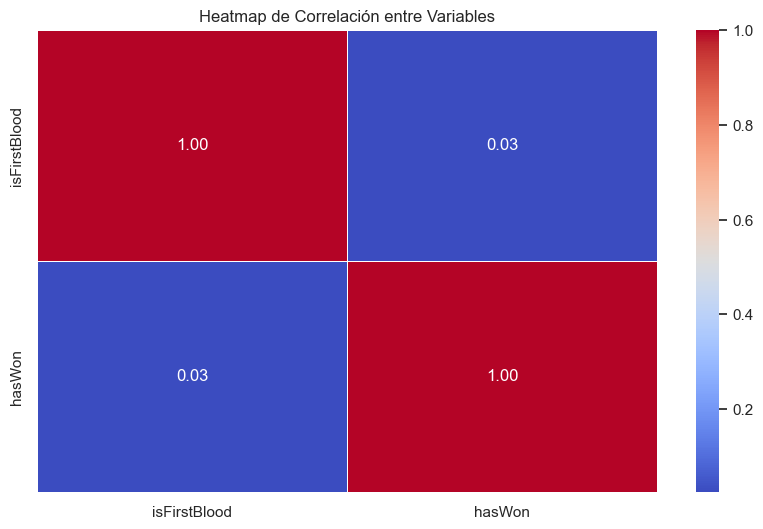

              isFirstBlood    hasWon
isFirstBlood      1.000000  0.025804
hasWon            0.025804  1.000000


In [55]:
def heatmap(df):

    # Seleccionamos las variables relevantes para el heatmap
    relevant_columns = ['isFirstBlood', 'hasWon']
    correlation_matrix = df[relevant_columns].corr()
    plt.figure(figsize=(10, 6))
    
    # Generamos el heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Heatmap de Correlación entre Variables')
    plt.show()

    print(correlation_matrix)


heatmap(df)

### **Resumen:**


Segun el analisis, los equipos que obtienen la Primera Sangre tienen una tasa de victorias significativamente mayor (49.86%) en comparacion con los equipos que no la obtienen (15.02%). El valor p (1.06e-36) y el estadistico Chi-Square (160.12) confirman que la correlacion entre isFirstBlood y hasWOn es estadísticamente significativa, a pesar de que la correlación es baja (0.026). Como resultado, obtener la Primera Sangre aumenta significativamente las posibilidades de ganar, a pesar de que el heatmap muestra una correlación baja.

## **Fase 4: Modeling**

### **How do neutral objectives (Dragons, Baron, and Rift Herald) impact a team’s victory?**

### **XGBOOSTCLASIFIER:**

#### **Split the Dataset:**

In [45]:
def split_data(df: pd.DataFrame, target_column: str, test_size: float = 0.2, random_state: int = 42) -> tuple:
    """
    Split a DataFrame into training and testing sets.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing features and the target variable.
    target_column (str): The name of the target variable column.
    test_size (float): The proportion of the dataset to include in the test split (default is 0.2).
    random_state (int): Controls the shuffling applied to the data before applying the split (default is 42).

    Returns:
    tuple: A tuple containing the training features (X_train), test features (X_test),
           training labels (y_train), and test labels (y_test).
    """
    # Assert that the target column exists in the DataFrame
    assert target_column in df.columns, f"Target column '{target_column}' does not exist in the DataFrame."

    # Separate features (X) and labels (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

**assert**

In [46]:
assert 'hasWon' in df_with_replaced_outliers.columns, "The target column 'hasWon' must be present in the DataFrame."

**Application of the Function**

In [47]:
X_train, X_test, y_train, y_test = split_data(df_with_replaced_outliers, target_column='hasWon')

#### **Model Creation:**

In [159]:
# Inicializar el clasificador XGBClassifier
model = XGBClassifier(verbosity=0)

#### **Grid Search:**

Dictionaries are defined to test different parameters for the model using grid search.

In [160]:
# Define the parameters to test
param_grid = {
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [2, 3, 4, 5],
    'min_child_weight': [1, 5, 10, 15, 19],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0]
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Execute GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [2, 3, 4, 5],
                         'min_child_weight': [1, 5, 10, 15, 19],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='f1', verbose=1)

In [161]:
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 19, 'n_estimators': 100, 'subsample': 1.0}


In [162]:
best_model = grid_search.best_estimator_

# Make predictions on the test set.
y_pred = best_model.predict(X_test)

After obtaining the best parameters according to grid search, different metrics will be used to validate the model's performance.

#### **SMOTE:**

Now we will apply SMOTE (Synthetic Minority Over-sampling Technique) to see if we can better balance the data and further improve the predictions.

In [163]:
def add_noise(data, noise_level=0.1):
    """
    Adds Gaussian noise to the input data.
    
    Parameters:
    data (np.ndarray): The input data to which noise will be added.
    noise_level (float): The standard deviation of the Gaussian noise.

    Returns:
    np.ndarray: The data with added noise.
    """
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

**assert**

In [164]:
# Example: Create a dummy training dataset
X_train_test = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Add noise to the training data
X_train_noisy_test = add_noise(X_train)

# Test the function
assert X_train_noisy_test.shape == X_train.shape, "The shape of the noisy data does not match the original data."
assert not np.array_equal(X_train_noisy, X_train), "The noisy data should not be equal to the original data."

**Application of the Function**

In [170]:
X_train_noisy = add_noise(X_train.to_numpy(), noise_level=0.1)  


#### **Model with SMOTE:**

In [171]:
model = XGBClassifier(
    learning_rate=0.5,
    max_depth=2,
    min_child_weight=19,
    n_estimators=100,
    n_jobs=1,
    subsample=0.95,
    verbosity=0
)

model.fit(X_train_noisy, y_train)
y_pred = model.predict(X_test)

##### **Classification Report**

In [172]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      2386
         1.0       0.91      0.89      0.90      2597

    accuracy                           0.90      4983
   macro avg       0.90      0.90      0.90      4983
weighted avg       0.90      0.90      0.90      4983



### **Summary:**
The model has achieved positive results by applying various metrics, thanks to the optimization performed through Grid Search. Additionally, the use of SMOTE to generate synthetic data and better balance the dataset resulted in an overall f1-score of 0.90, indicating effective and balanced classification.

### **XGBOOSTREGRESSOR:**

#### **Split the Dataset:**

In [48]:
X_train, X_test, y_train, y_test = split_data(df_with_replaced_outliers, target_column='hasWon')

#### **Model Creation:**

In [58]:
model = XGBRegressor(verbosity=0)

#### **Grid Search:**

In [51]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [100, 200],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # or use 'r2' for R²
                           cv=5,  # Number of cross-validation folds
                           verbose=1,
                           n_jobs=-1)  # Use all available cores

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [52]:
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}


In [53]:
best_model = grid_search.best_estimator_

# Make predictions on the test set.
y_pred = best_model.predict(X_test)

##### **R²**

In [59]:
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.2f}")

R² Score: 0.69


### **Summary:**
The regression model demonstrated satisfactory performance with an R² score of 0.69, indicating that it explains approximately 69% of the variability in the target variable. In contrast, the classification model achieved a notable accuracy of 90%. While both models effectively fit their respective data types, the higher accuracy of the classification model underscores its stronger performance in distinguishing between classes compared to the regression model's ability to predict continuous outcomes.

### **Does securing First Blood increase the chances of winning the game?**

#### **Split the Dataset:**

In [ ]:
X_train, X_test, y_train, y_test = split_data(df_with_replaced_outliers, target_column='hasWon')

## **Fase 5: Evaluation**

### **How do neutral objectives (Dragons, Baron, and Rift Herald) impact a team’s victory?**

### **XGBOOSTCLASIFIER:**

#####  **Confusion Matrix:**

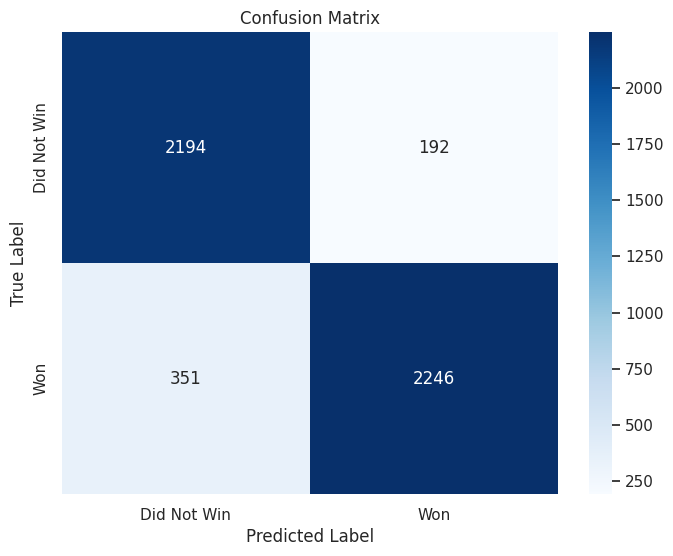

In [174]:
conf_matrix = confusion_matrix(y_test, y_pred_noisy)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Win', 'Won'], yticklabels=['Did Not Win', 'Won'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


##### **Classification_report:**

In [175]:
report = classification_report(y_test, y_pred_noisy)
print("Classification_report:\n", report)

Classification_report:
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      2386
         1.0       0.92      0.86      0.89      2597

    accuracy                           0.89      4983
   macro avg       0.89      0.89      0.89      4983
weighted avg       0.89      0.89      0.89      4983



The obtained F1 score was quite good, indicating positive results, and the data appears to be well-balanced.

##### **Curva ROC:**

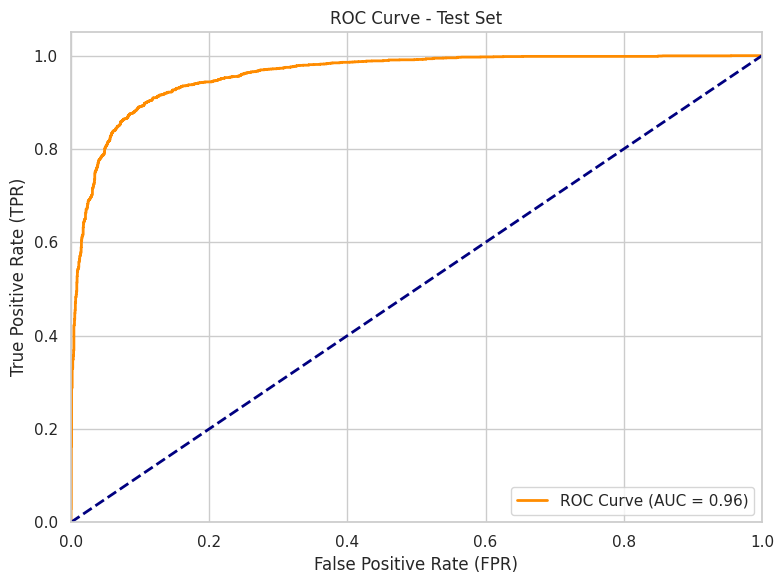

In [178]:
# Make probability predictions
probabilities_test = best_model.predict_proba(X_test)[:, 1]  

# Calculate the ROC curve using the true labels from the test set
fpr, tpr, thresholds = roc_curve(y_test, probabilities_test)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Test Set')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


An AUC of 0.96 indicates excellent model performance, showing a 96% chance of correctly ranking positive instances higher than negative ones. This suggests the model is highly effective at distinguishing between classes.

##### **Prediction**

In [179]:
# Define the number of synthetic data rows you want to generate
num_rows = 5

# Generate synthetic data
synthetic_data = {
    'gameId': np.random.randint(1, 1000, size=num_rows), 
    'frame': np.random.randint(0, 1000, size=num_rows), 
    'killedFireDrake': np.random.randint(0, 2, size=num_rows),  
    'killedWaterDrake': np.random.randint(0, 2, size=num_rows), 
    'killedAirDrake': np.random.randint(0, 2, size=num_rows),   
    'killedEarthDrake': np.random.randint(0, 2, size=num_rows),
    'killedElderDrake': np.random.randint(0, 2, size=num_rows), 
    'lostFireDrake': np.random.randint(0, 2, size=num_rows),    
    'lostWaterDrake': np.random.randint(0, 2, size=num_rows),   
    'lostAirDrake': np.random.randint(0, 2, size=num_rows),    
    'lostEarthDrake': np.random.randint(0, 2, size=num_rows), 
    'lostElderDrake': np.random.randint(0, 2, size=num_rows),   
    'killedBaronNashor': np.random.randint(0, 2, size=num_rows), 
    'lostBaronNashor': np.random.randint(0, 2, size=num_rows),   
    'killedRiftHerald': np.random.randint(0, 2, size=num_rows),  
    'lostRiftHerald': np.random.randint(0, 2, size=num_rows),   
    'totalDragonsKilled': np.random.randint(0, 10, size=num_rows), 
    'totalDragonsLost': np.random.randint(0, 10, size=num_rows),   
    'totalObjectivesKilled': np.random.randint(0, 15, size=num_rows), 
    'totalObjectivesLost': np.random.randint(0, 15, size=num_rows),   
}

# Create DataFrame
df_new_data = pd.DataFrame(synthetic_data)


In [180]:
# Make predictions
predictions = best_model.predict(df_new_data)

# Convert predictions to labels 'Win' or 'Lose'
results = ['Win' if pred == 1 else 'Lose' for pred in predictions]

# Show results
print("Prediction results:", results)

Prediction results: ['Lose', 'Lose', 'Win', 'Win', 'Win']


### **XGBOOSTREGRESSOR:**

##### **Metrics**

In [60]:
# Assuming y_test are the true values and y_pred are the predictions made by your model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


R² Score: 0.69
Mean Absolute Error: 0.16
Mean Squared Error: 0.08
Root Mean Squared Error: 0.28


/home/pepa/anaconda3/envs/mi_entorno_cuml/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The evaluation of the regression model yielded an R² score of 0.69, indicating that approximately 69% of the variability in the target variable can be explained by the model. The Mean Absolute Error (MAE) was calculated at 0.16, suggesting that the predictions are generally close to the actual values. Additionally, the Mean Squared Error (MSE) was found to be 0.08, while the Root Mean Squared Error (RMSE) stood at 0.28. These metrics collectively indicate a solid performance of the regression model in predicting outcomes.

##### **Prediction**

In [66]:
# Define the number of synthetic data rows you want to generate
num_rows = 5

# Generate synthetic data
synthetic_data = {
    'gameId': np.random.randint(1, 1000, size=num_rows), 
    'frame': np.random.randint(0, 1000, size=num_rows), 
    'killedFireDrake': np.random.randint(0, 2, size=num_rows),  
    'killedWaterDrake': np.random.randint(0, 2, size=num_rows), 
    'killedAirDrake': np.random.randint(0, 2, size=num_rows),   
    'killedEarthDrake': np.random.randint(0, 2, size=num_rows),
    'killedElderDrake': np.random.randint(0, 2, size=num_rows), 
    'lostFireDrake': np.random.randint(0, 2, size=num_rows),    
    'lostWaterDrake': np.random.randint(0, 2, size=num_rows),   
    'lostAirDrake': np.random.randint(0, 2, size=num_rows),    
    'lostEarthDrake': np.random.randint(0, 2, size=num_rows), 
    'lostElderDrake': np.random.randint(0, 2, size=num_rows),   
    'killedBaronNashor': np.random.randint(0, 2, size=num_rows), 
    'lostBaronNashor': np.random.randint(0, 2, size=num_rows),   
    'killedRiftHerald': np.random.randint(0, 2, size=num_rows),  
    'lostRiftHerald': np.random.randint(0, 2, size=num_rows),   
    'totalDragonsKilled': np.random.randint(0, 10, size=num_rows), 
    'totalDragonsLost': np.random.randint(0, 10, size=num_rows),   
    'totalObjectivesKilled': np.random.randint(0, 15, size=num_rows), 
    'totalObjectivesLost': np.random.randint(0, 15, size=num_rows),   
}

# Create DataFrame
df_new_data = pd.DataFrame(synthetic_data)


In [68]:
# Make predictions
predictions = best_model.predict(df_new_data)

# Convert predictions to labels 'Win' or 'Lose'
results = ['Win' if pred == 1 else 'Lose' for pred in predictions]

# Show results
print("Prediction results:", results)

Prediction results: ['Lose', 'Lose', 'Lose', 'Lose', 'Lose']


### **Does securing First Blood increase the chances of winning the game?**